In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *
from copy import copy, deepcopy
import matplotlib as mpl
import seaborn as sns

from models.geophysic_models.carbon_cycle_models import *
from models.geophysic_models.temperature_dynamic_model import *
from models.geophysic import *
from models.game_theory.benefit_function import *
from models.game_theory.damage_function import *

from models.game import *
from plot_function import *

sns.set_style('ticks',  {"axes.grid" : "True", "grid.color": ".4", "grid.linestyle": ":"})
sns.set_context('talk')

# sns.set_style('darkgrid',  {"axes.grid" : "True", "grid.color": ".6", "grid.linestyle": ":"})
# sns.set_context("talk")
# plt.rcParams.update({
#     # "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"],
#     "figure.titlesize": 16})
plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams['xtick.direction'] = 'out'
# sns.axes_style( { 'xtick.color': 'black',
#  'ytick.color': 'black',
#  'xtick.bottom': True,
#  'xtick.top': True,
#  'ytick.left': True,
#  'ytick.right': True})
# # mpl.rc('text', usetex=True)
# mpl.rc('ytick'  , labelsize=15)
# mpl.rc('xtick'  , labelsize=13)
mpl.rc('legend' , fontsize= 15)
# mpl.rc('axes'   , labelsize=15,  titlesize=16) 
# plt.rcParams['font.size'] = '16'

carbon_model = Carbon_JOOS()
temperature_model = Temp_Discret_Geoffroy()
smc = geophysics(carbon_model, temperature_model)

# Nombre de joueur 
N = 6

# Espaces d'action des joueurs en GtCO2

action_sets = np.array([[0.0, 12.0],        # China  
                        [0.0, 8.0],         # USA
                        [0.0, 5.0],         # EU
                        [0.0, 4.0],         # India
                        [0.0, 7.0],         # Russia
                        [0.0, 5.0]])        # other Asia    

# Coefficient d'impact de la temperature sur le climat 

deltas = np.array([1.1847,
                    1.1941,
                    1.1248,
                    0.9074,
                    1.2866,
                    1.1847]) 

# PIB max des joueurs, j'ai pris le PIB 2020                

gdp_max = np.array([15.0,
                    18.0,
                    17.0,
                    2.6,
                    1.6,
                    26.0])

omegas = gdp_max/np.sum(gdp_max)



In [2]:
figsize=(9,6)

In [3]:
figsize

(9, 6)

In [3]:
sns.plotting_context()

{'font.size': 18.0,
 'axes.labelsize': 18.0,
 'axes.titlesize': 18.0,
 'xtick.labelsize': 16.5,
 'ytick.labelsize': 16.5,
 'legend.fontsize': 15.0,
 'axes.linewidth': 1.875,
 'grid.linewidth': 1.5,
 'lines.linewidth': 2.25,
 'lines.markersize': 9.0,
 'patch.linewidth': 1.5,
 'xtick.major.width': 1.875,
 'ytick.major.width': 1.875,
 'xtick.minor.width': 1.5,
 'ytick.minor.width': 1.5,
 'xtick.major.size': 9.0,
 'ytick.major.size': 9.0,
 'xtick.minor.size': 6.0,
 'ytick.minor.size': 6.0,
 'legend.title_fontsize': 18.0}

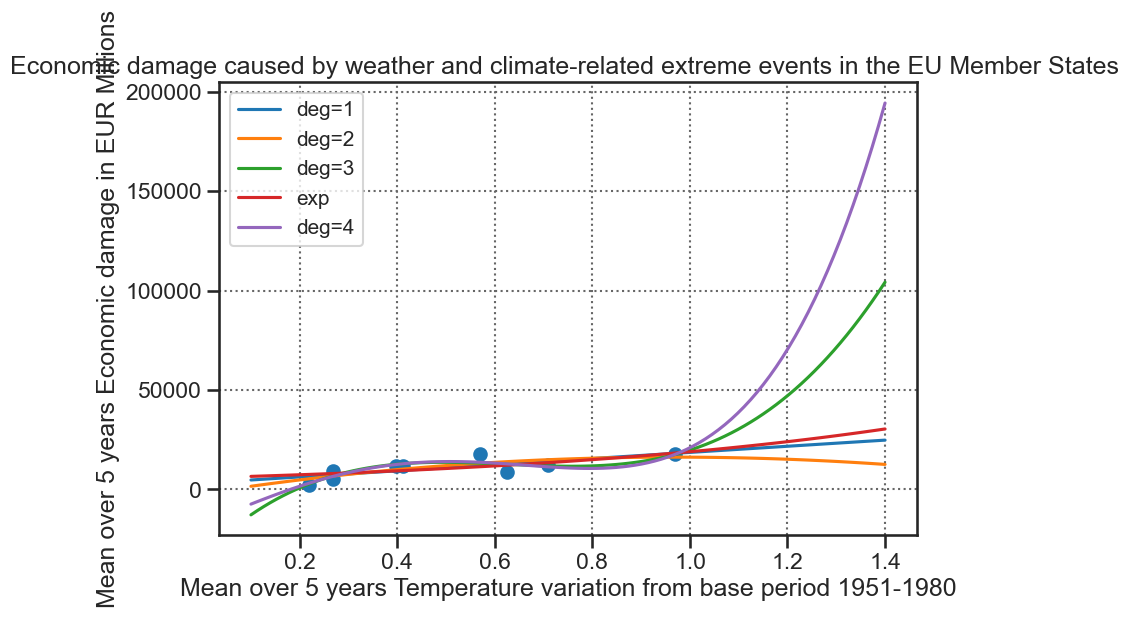

In [5]:
import pandas as pd


data = pd.read_csv('data/natural-disasters-events-5.csv')
data_temp = pd.read_csv('data/temperature_NASA_2022.csv')

data_temp = data_temp[data_temp['Year'] >=1980]
data_temp = data_temp[data_temp['Year'] <=2020]


z = data_temp['MAM'].to_numpy()

y = data['Hydrological events:number'].to_numpy() + data['Climatological events:number'].to_numpy() + data['Meteorological events:number'].to_numpy()

x = np.linspace(0.1,1.4,100)

z_5y = np.array([np.sum(z[t:t+5])/5 for t in range(0,len(y),5)])
y_5y = np.array([np.sum(y[t:t+5])/5 for t in range(0,len(y),5)])

inds = np.argsort(z_5y)
z_5y = np.sort(z_5y)
y_5y = y_5y[inds]

from scipy.optimize import curve_fit

[a, b], res1 = curve_fit(lambda x1,a,b: a*np.exp(b*x1),  z_5y,  y_5y)

y1 = a * np.exp(b * x)

 
poly_1 = np.polyfit(z_5y, y_5y, 1)
poly_2 = np.polyfit(z_5y, y_5y, 2)
poly_3 = np.polyfit(z_5y, y_5y, 3)
poly_4 = np.polyfit(z_5y, y_5y, 4)
plt.figure(figsize=figsize, dpi=100)
plt.scatter(z_5y,y_5y)
plt.plot(x, np.polyval(poly_1,x), label= 'deg=1')
plt.plot(x, np.polyval(poly_2,x), label= 'deg=2')
plt.plot(x, np.polyval(poly_3,x), label= 'deg=3')
plt.plot(x, y1, label='exp')
plt.plot(x, np.polyval(poly_4,x), label= 'deg=4')
# plt.yscale('log')
plt.ylabel("Mean over 5 years Economic damage in EUR Millions")
plt.xlabel('Mean over 5 years Temperature variation from base period 1951-1980')
plt.title('Economic damage caused by weather and climate-related extreme events in the EU Member States ')
plt.legend()
plt.show()

C:\Users\Anthony Couthures\AppData\Local\Temp\ipykernel_16060\3233256367.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x/100:.0%}' for x in plt.gca().get_yticks()])


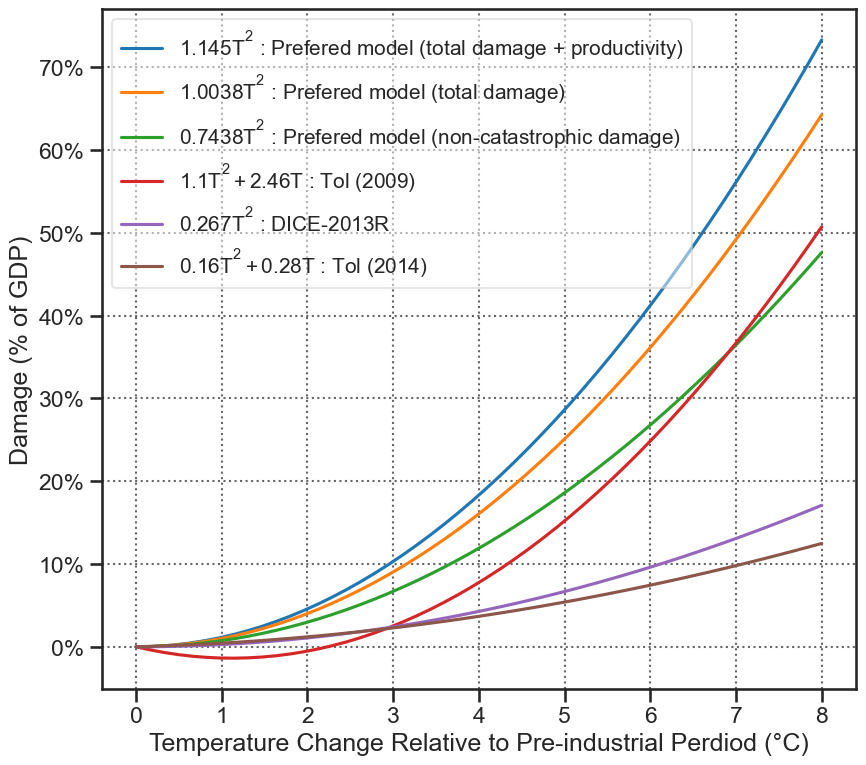

In [4]:
plt.figure(figsize =(9,8),dpi=100, tight_layout=True)
x = np.linspace(0,8, 50)
plt.plot(x, np.polyval(np.flip([0,0,1.1450]),x), label = '${} T^2$ : Prefered model (total damage + productivity)'.format(1.1450))
plt.plot(x, np.polyval(np.flip([0,0,1.0038]),x), label = '${} T^2$ : Prefered model (total damage) '.format(1.0038))
plt.plot(x, np.polyval(np.flip([0,0,0.7438]),x), label = '${} T^2$ : Prefered model (non-catastrophic damage)'.format(0.7438))
plt.plot(x, np.polyval(np.flip([0,-2.46,1.1]),x), label = '${} T^2 + {}T$ : Tol (2009)'.format(1.1, 2.46))
plt.plot(x, np.polyval(np.flip([0,0,0.267]),x), label = '${} T^2$ : DICE-2013R'.format(0.267))
plt.plot(x, np.polyval(np.flip([0,0.28,0.16]),x), label = '${} T^2 + {}T$ : Tol (2014)'.format(0.16, 0.28))
plt.xlabel('Temperature Change Relative to Pre-industrial Perdiod (°C)')
plt.ylabel(r'Damage (% of GDP)')
plt.gca().set_yticklabels([f'{x/100:.0%}' for x in plt.gca().get_yticks()]) 
plt.legend(fancybox=True, framealpha=0.5)
plt.savefig(format='pdf', fname ='multiplicative_damage.pdf')
plt.show()

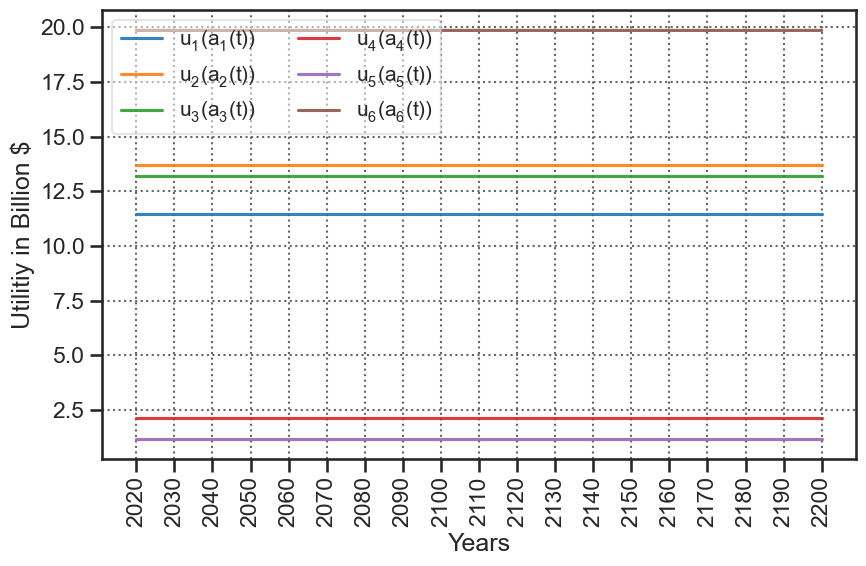

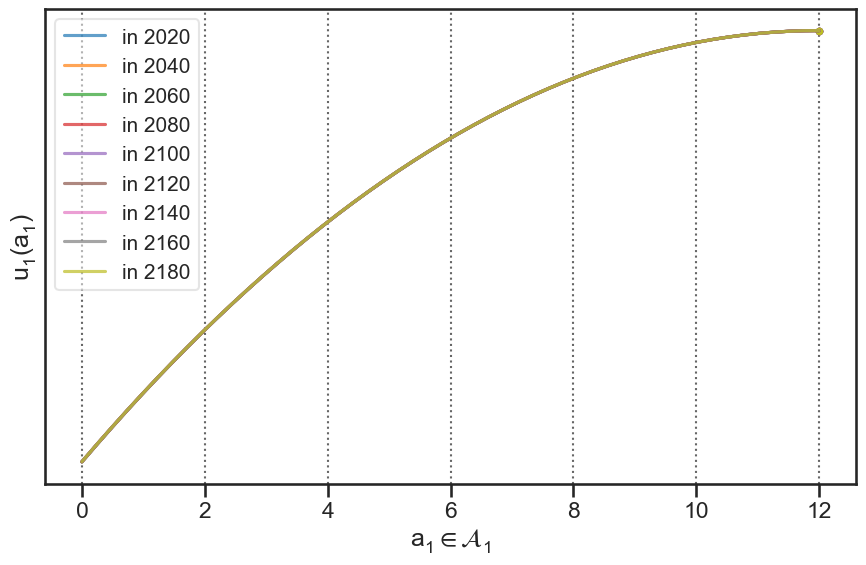

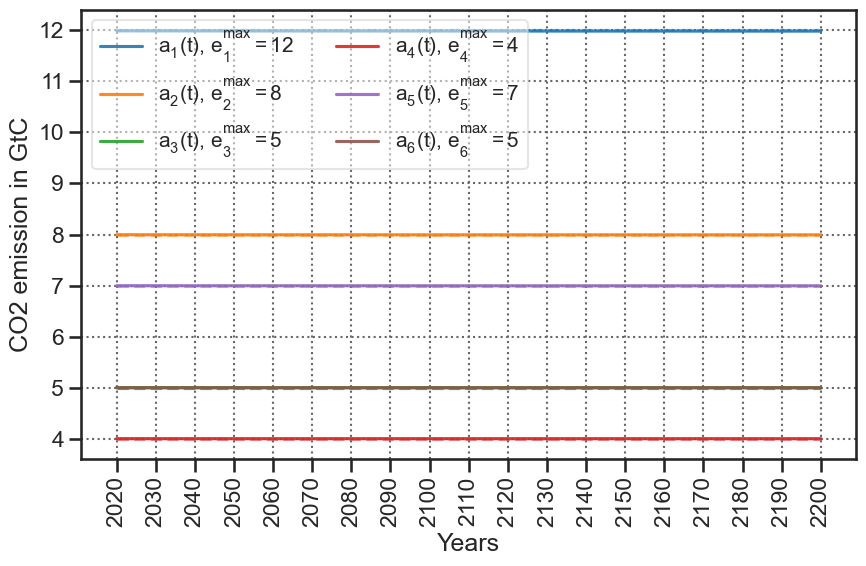

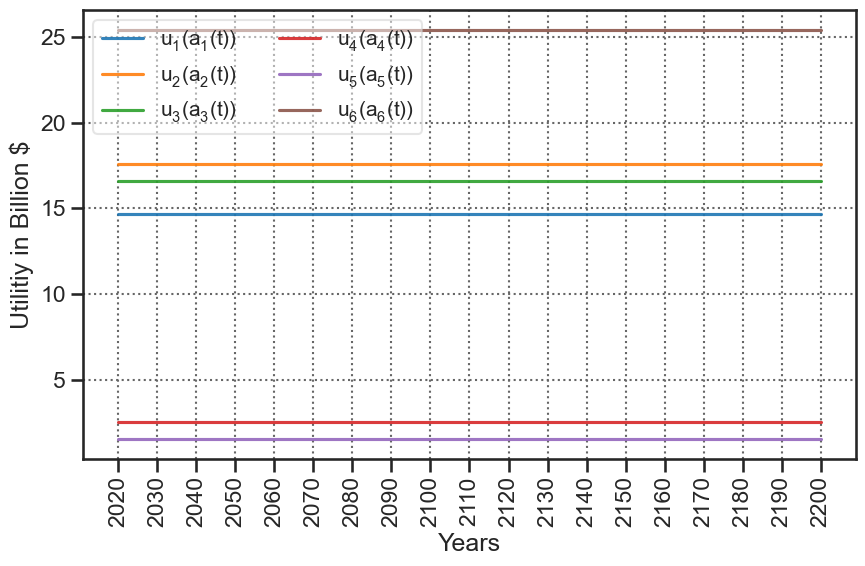

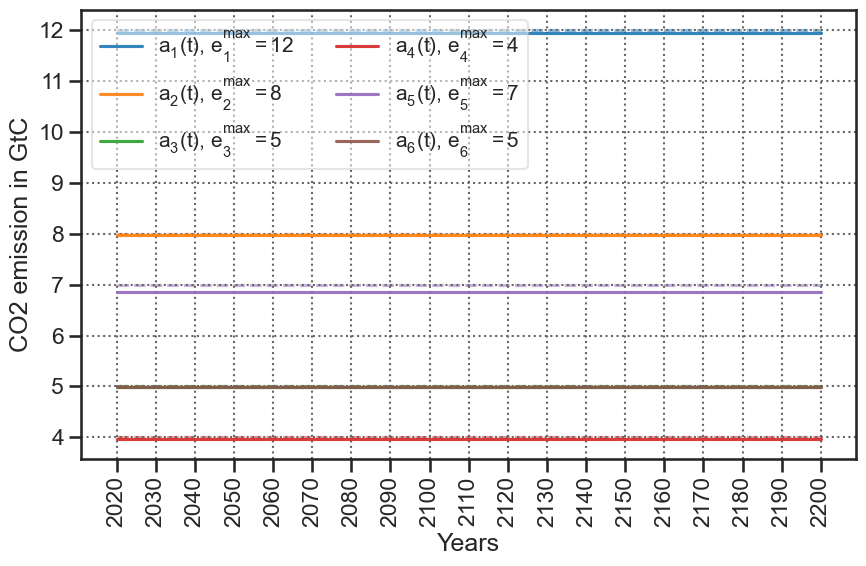

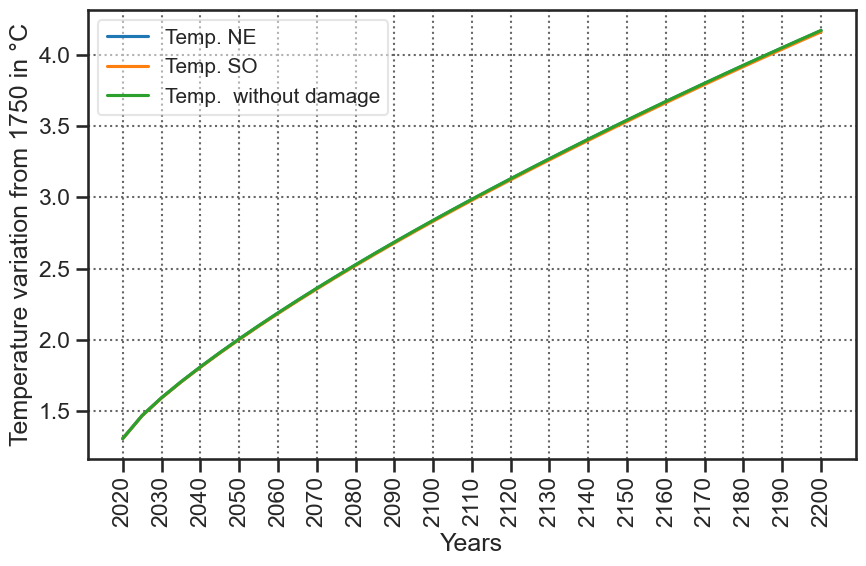

In [5]:
# puissance de la fonction damage 

alpha =1

# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,0,1.145])

# Création des joueurs 

list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                benefit_function = benefit_quadratic_concave_with_percentage_green(gdp_max[i], action_sets[i][1], percentage_green=0.1),
                                damage_function = damage_polynome_percentage_GDP(damage_coef, gdp_max[i]),
                                impact_factor_of_temperature = deltas[i],
                                alpha=alpha) for i in range(N)]

# Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

game = Game(deepcopy(smc), list_players)

# Plot du jeux -> le fonction plot est dans plot_function.py

# plot_nash= plot de la best response dynamic , plot_SO = plot les actions social optimales ,  plot_bau = plot les actions sans fonction damage

plot_Game(game, plot_nash=True, plot_SO=True,  plot_bau = True ,figsize=figsize, name='fig')

In [6]:
game.temp_profile[-1]

4.172037546047251

In [7]:
game.temp_profile[-1]

4.171213211943247

## DICE damage function 

La fonction damage de DICE retourne uniquement des BAU, c'est surement dut au fait que ce n'est pas la même méthodologie, en effet, Nordaus fixe une temperature cible et donne un budget carbon pour atteindre cette temperature. La fonction "damage" permet de répartire de façon optimale les emissions de CO2 dans une trajectoire donnée. Donc la fonction damage dépende au prélable de la temperature cible et n'as pas de sens d'être utiliser pour la temperature on the fly comme dans les simulations. 

### Affine Benefit

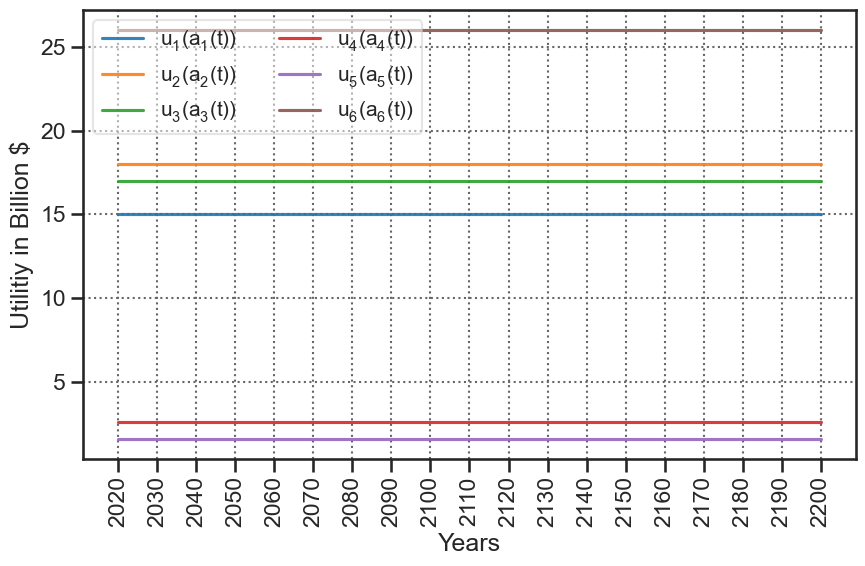

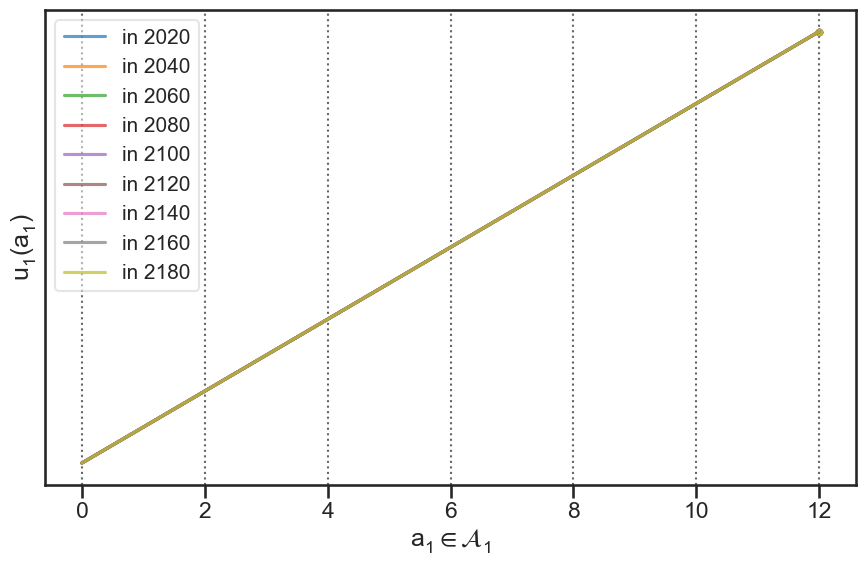

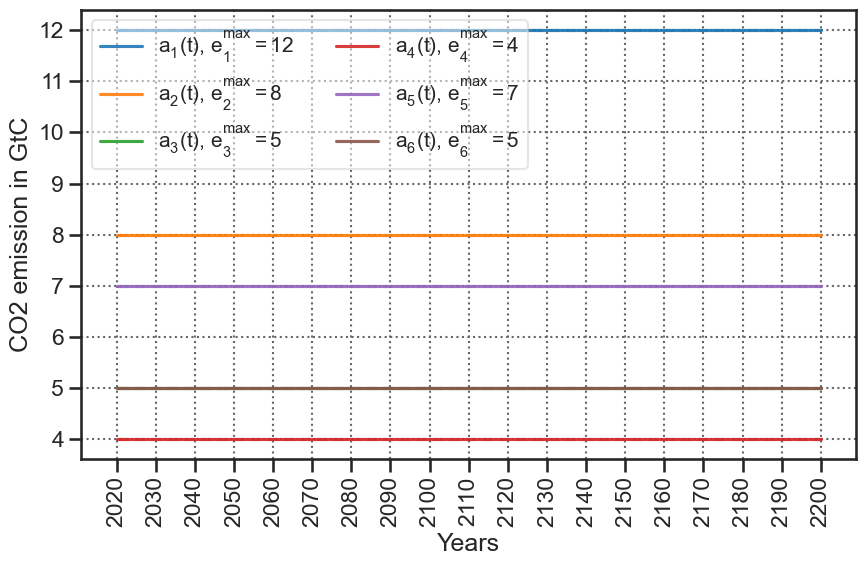

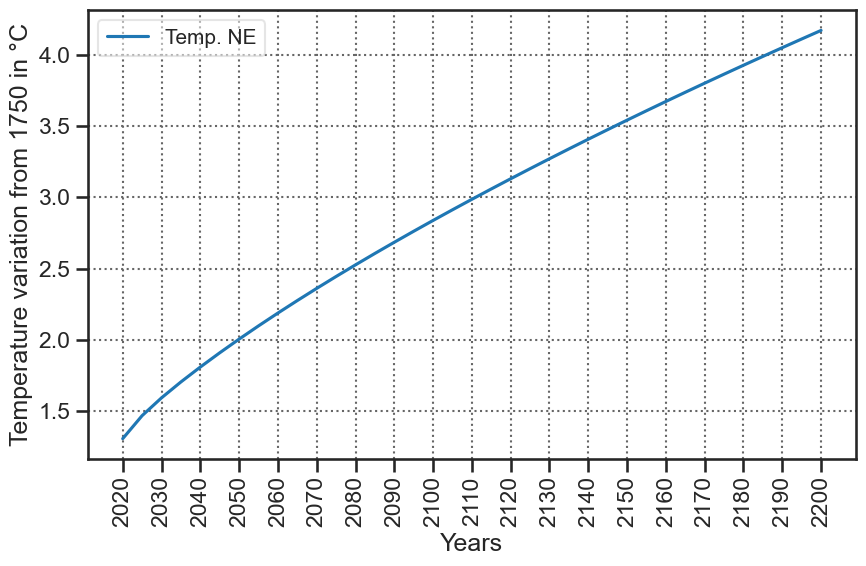

In [4]:
alpha =1

# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,0,0.0022])*0

# Création des joueurs 

list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                benefit_function = benefit_affine(gdp_max[i], action_sets[i][1]),
                                damage_function = damage_polynome(damage_coef),
                                impact_factor_of_temperature = gdp_max[i] , alpha=alpha) for i in range(N)]

# Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

game = Game(deepcopy(smc), list_players)

# Plot du jeux -> le fonction plot est dans plot_function.py

# plot_nash= plot de la best response dynamic , plot_SO = plot les actions social optimales ,  plot_bau = plot les actions sans fonction damage

plot_Game(game, plot_nash=True, plot_SO=False,  plot_bau = False ,figsize=figsize, name='affine_no_damage_beamer_seminar')

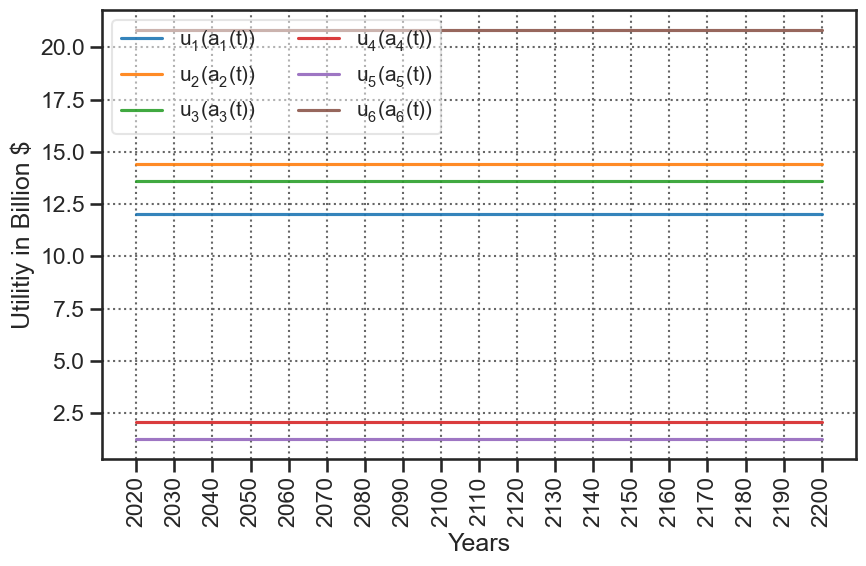

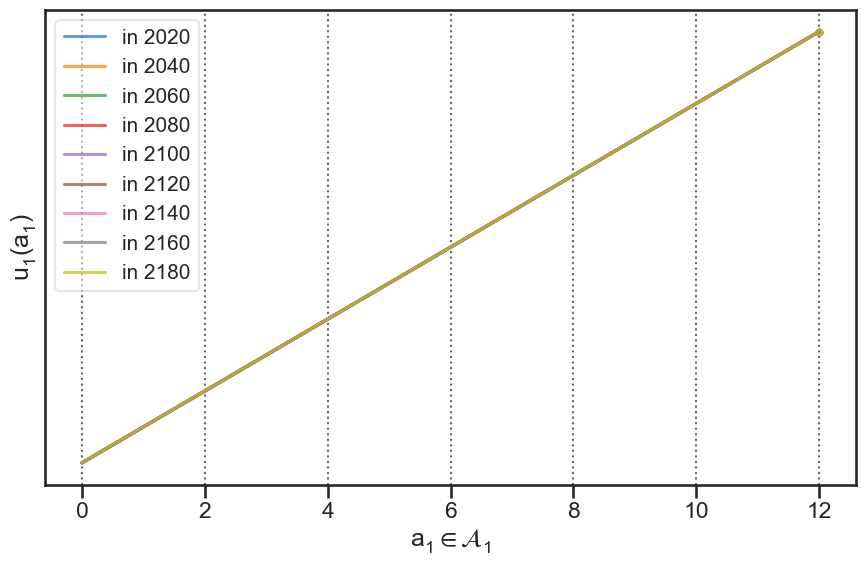

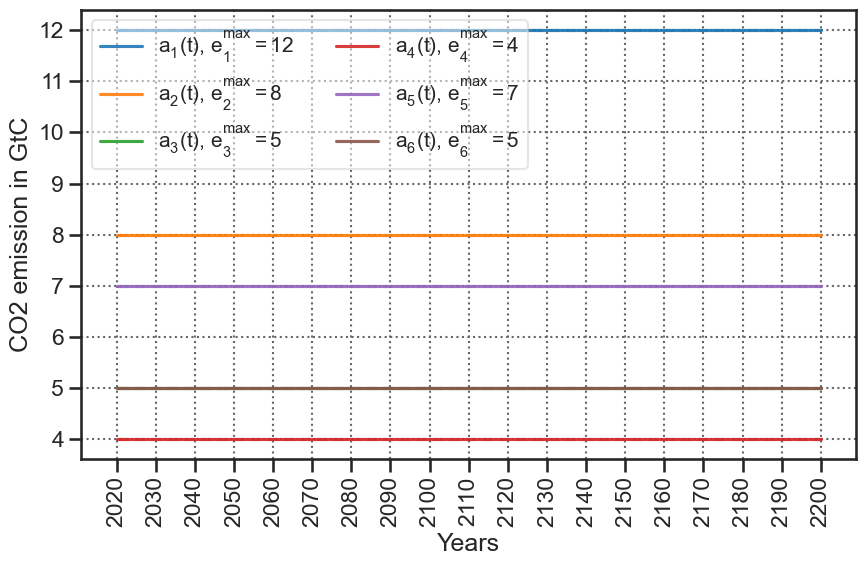

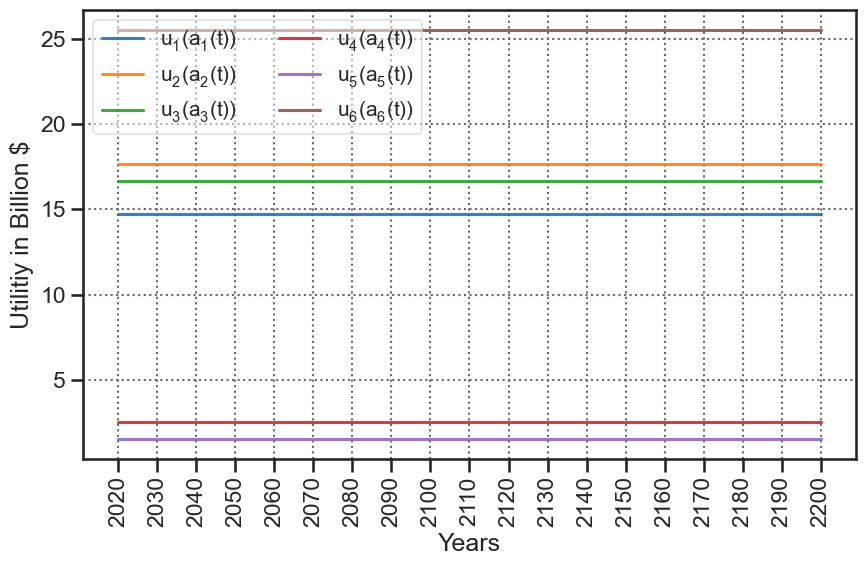

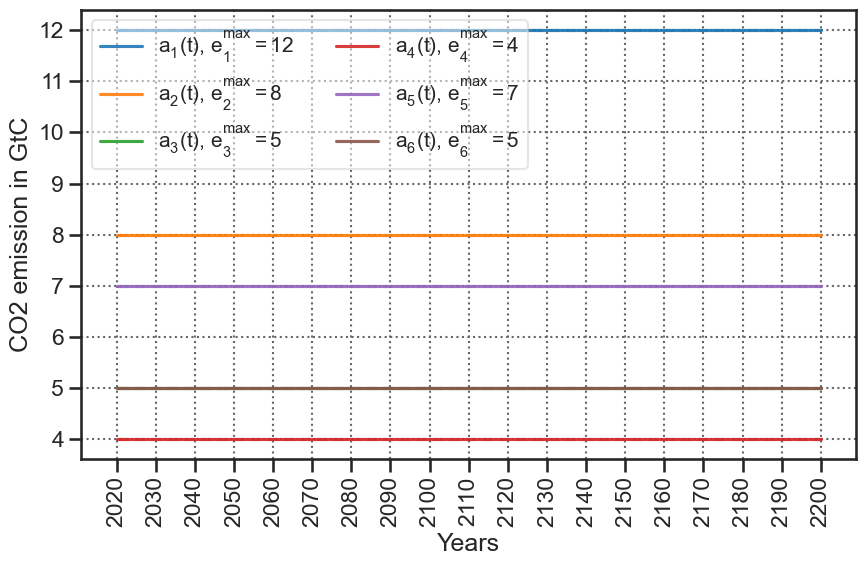

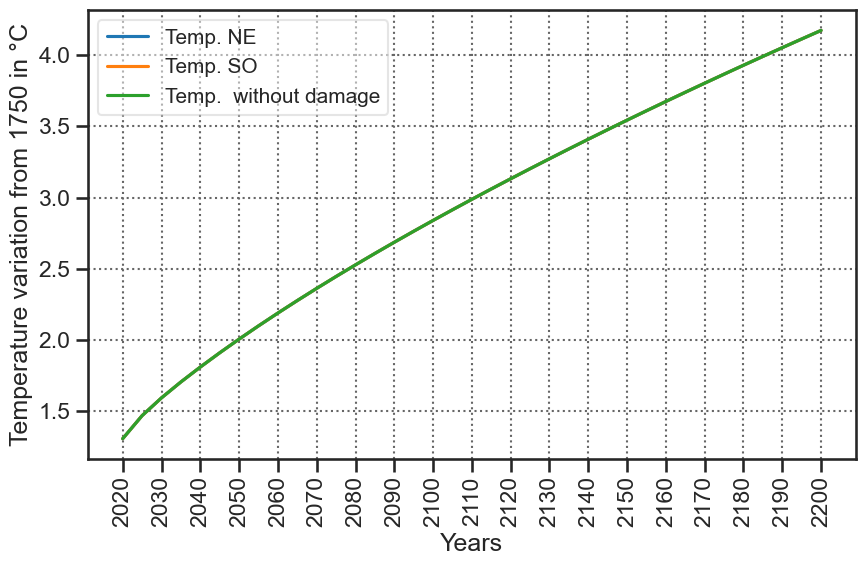

In [9]:
alpha =1

# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,0,1.145])

# Création des joueurs 

list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                benefit_function = benefit_affine(gdp_max[i], action_sets[i][1]),
                                damage_function = damage_polynome_percentage_GDP(damage_coef, gdp_max[i]),
                                impact_factor_of_temperature = 1 , alpha=alpha) for i in range(N)]

# Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

game = Game(deepcopy(smc), list_players)

# Plot du jeux -> le fonction plot est dans plot_function.py

# plot_nash= plot de la best response dynamic , plot_SO = plot les actions social optimales ,  plot_bau = plot les actions sans fonction damage

plot_Game(game, plot_nash=True, plot_SO=True,  plot_bau = True ,figsize=figsize, name='affine_multiplicative_damage_beamer_seminar')

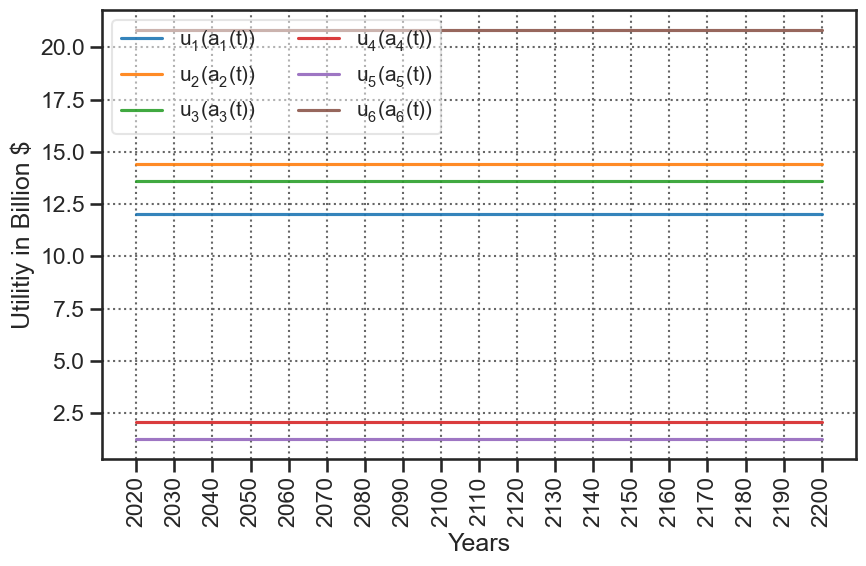

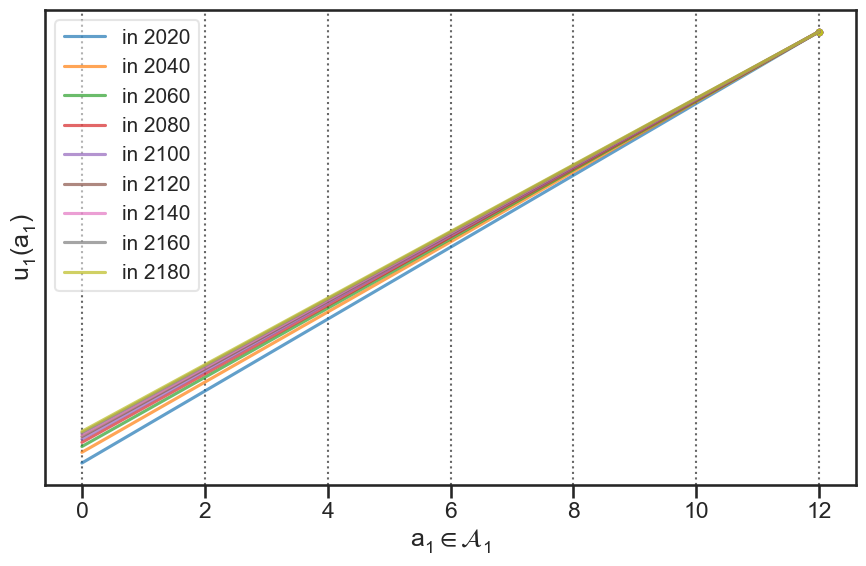

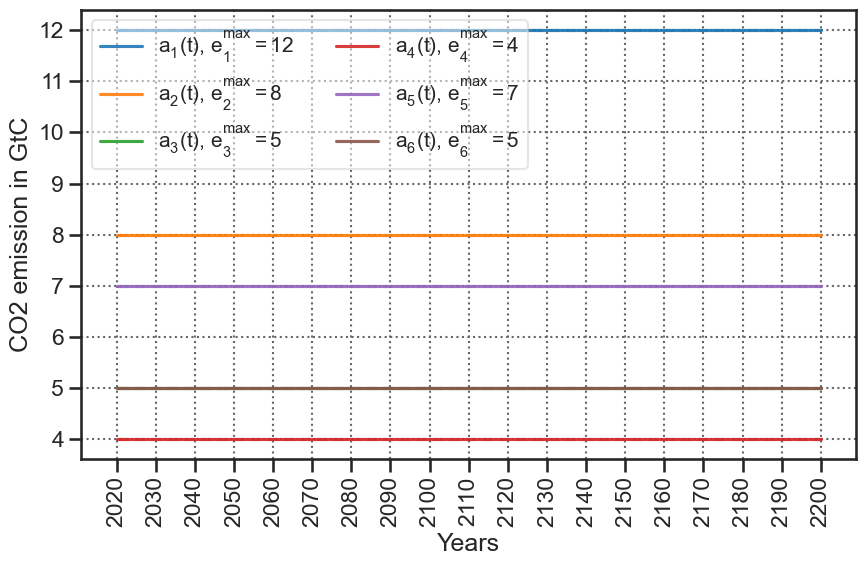

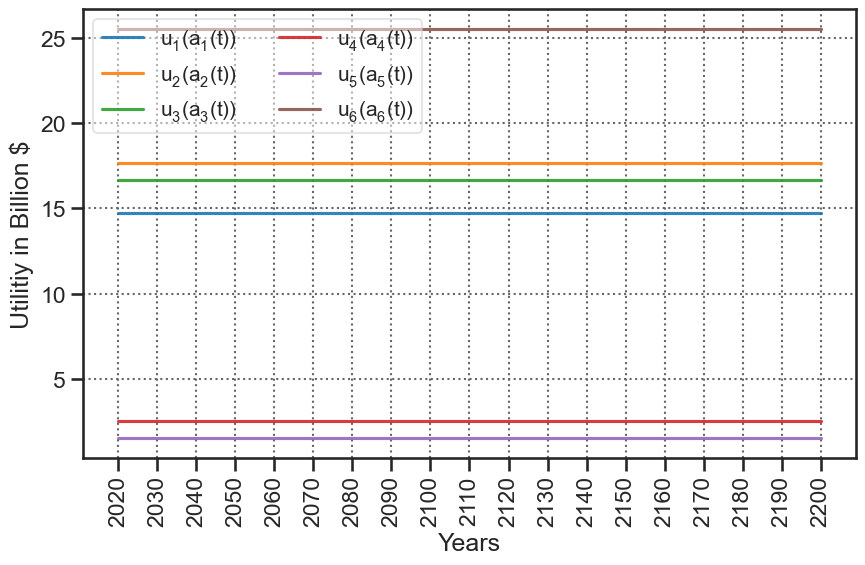

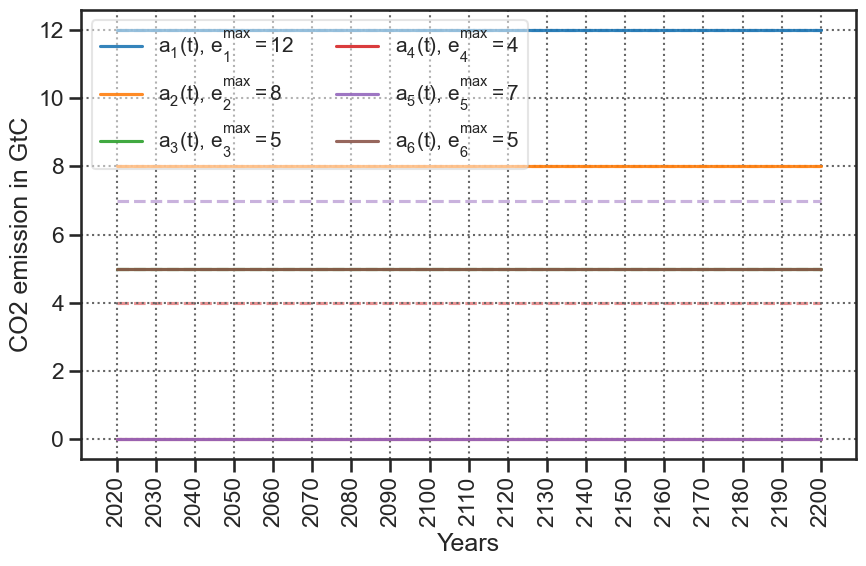

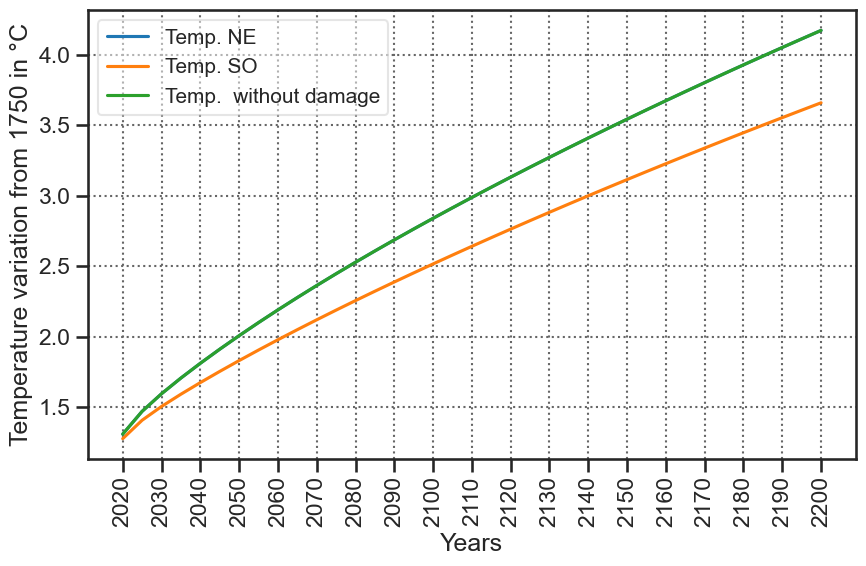

In [10]:
alpha =1

# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,0,1.145])

# Création des joueurs 

list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                benefit_function = benefit_affine(gdp_max[i], action_sets[i][1], .990),
                                damage_function = damage_polynome_percentage_GDP(damage_coef, gdp_max[i]),
                                impact_factor_of_temperature = 1 , alpha=alpha) for i in range(N)]

# Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

game = Game(deepcopy(smc), list_players)

# Plot du jeux -> le fonction plot est dans plot_function.py

# plot_nash= plot de la best response dynamic , plot_SO = plot les actions social optimales ,  plot_bau = plot les actions sans fonction damage

plot_Game(game, plot_nash=True, plot_SO=True,  plot_bau = True ,figsize=figsize, name='affine_with_green_multiplicative_damage_beamer_seminar')

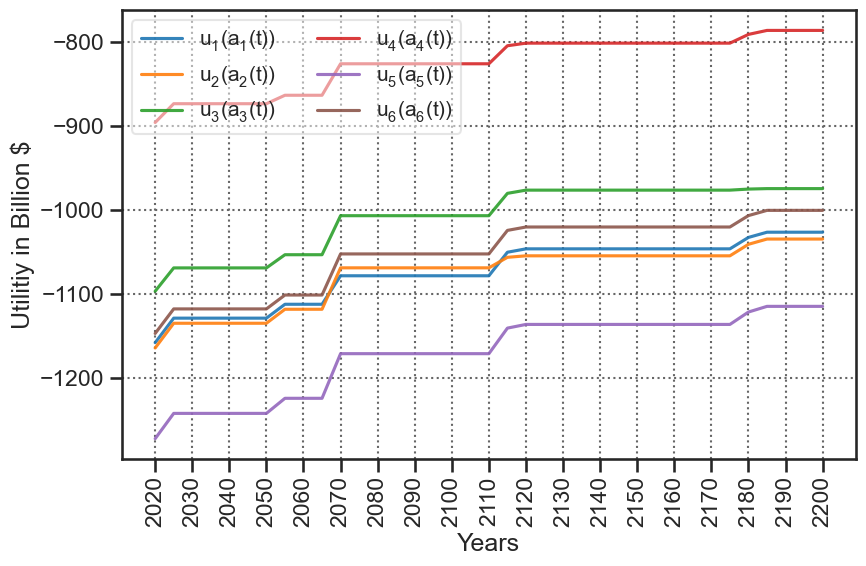

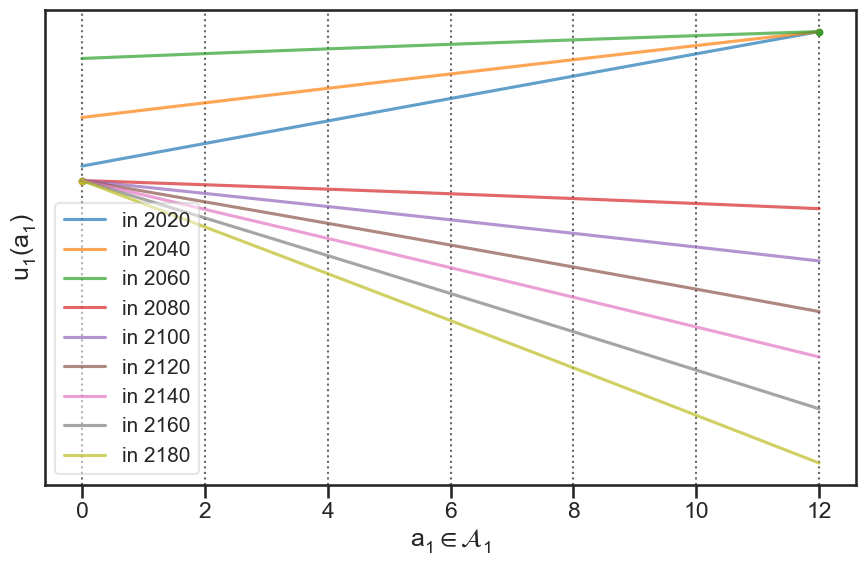

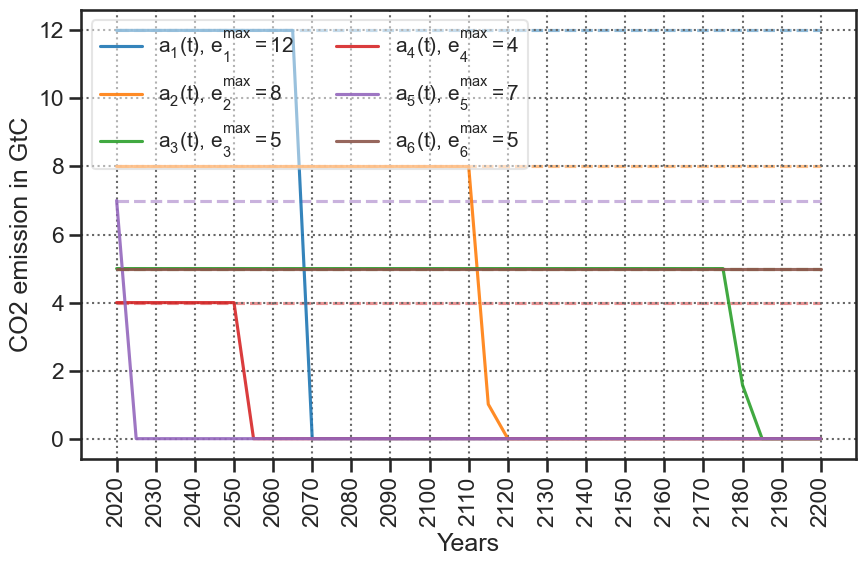

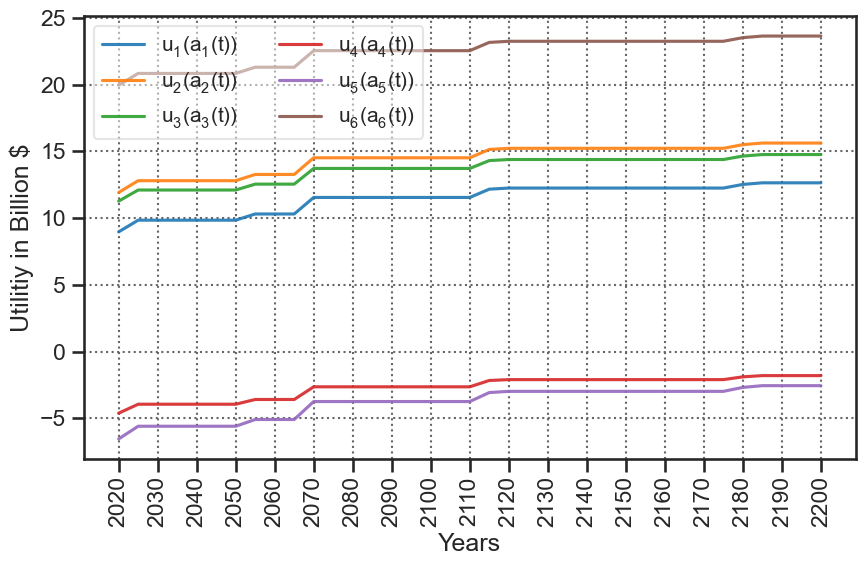

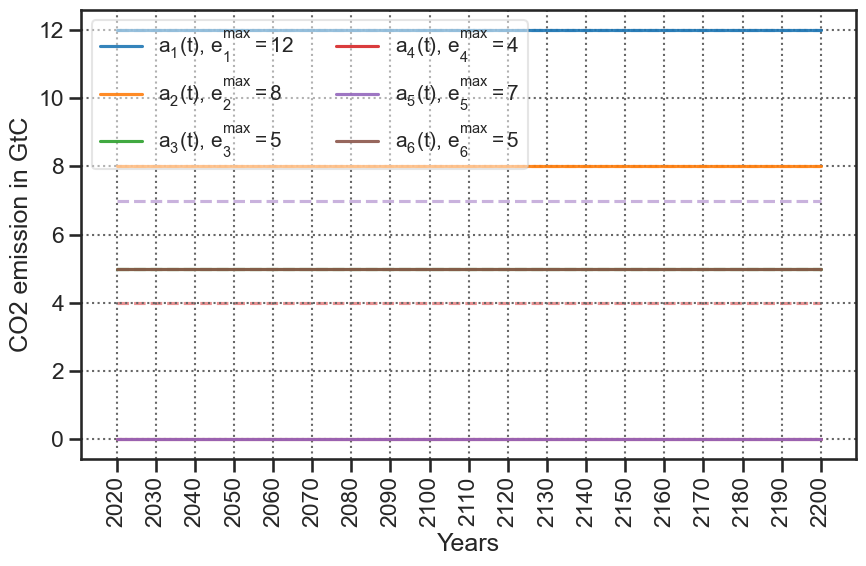

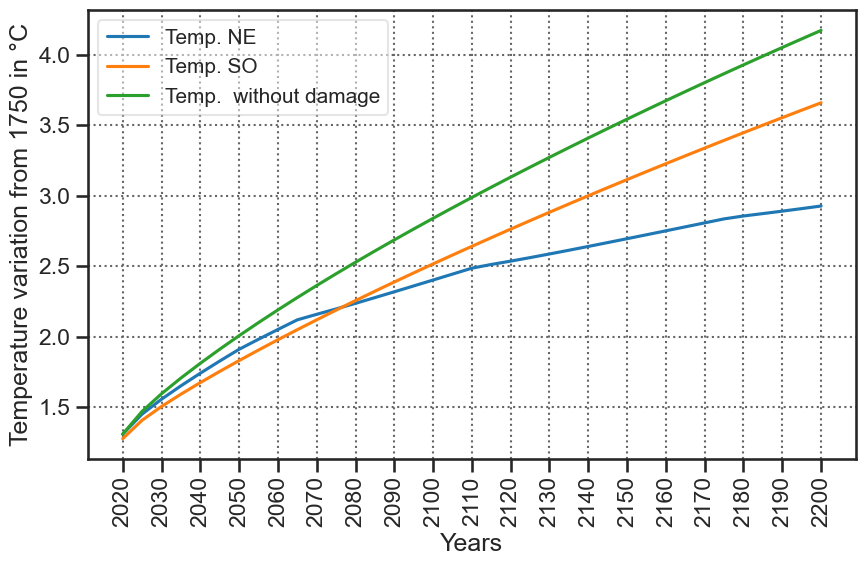

In [21]:
alpha =2

# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,-5,5.145])

# Création des joueurs 

list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                benefit_function = benefit_affine(gdp_max[i], action_sets[i][1]),
                                
                                damage_function = damage_polynome(damage_coef),
                                impact_factor_of_temperature = deltas[i] , alpha=alpha) for i in range(N)]

# Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

game = Game(deepcopy(smc), list_players)

# Plot du jeux -> le fonction plot est dans plot_function.py

# plot_nash= plot de la best response dynamic , plot_SO = plot les actions social optimales ,  plot_bau = plot les actions sans fonction damage

plot_Game(game, plot_nash=True, plot_SO=True,  plot_bau = True ,figsize=figsize, name='affine_additive_damage_beamer_seminar')

### Quadratic benefit

#### Benefit concave

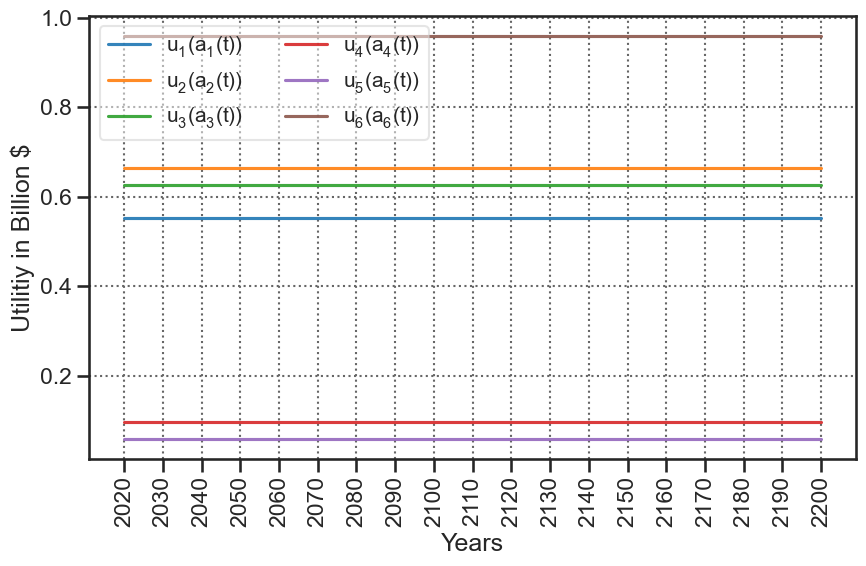

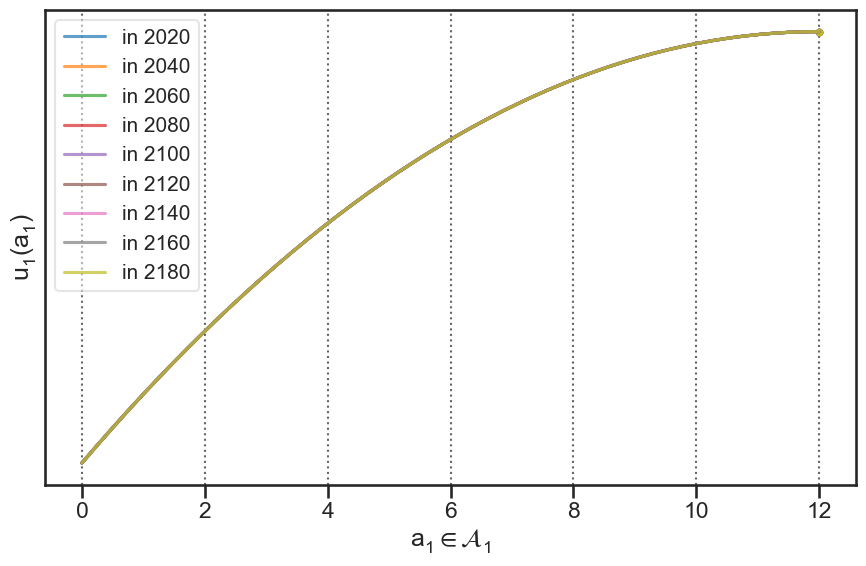

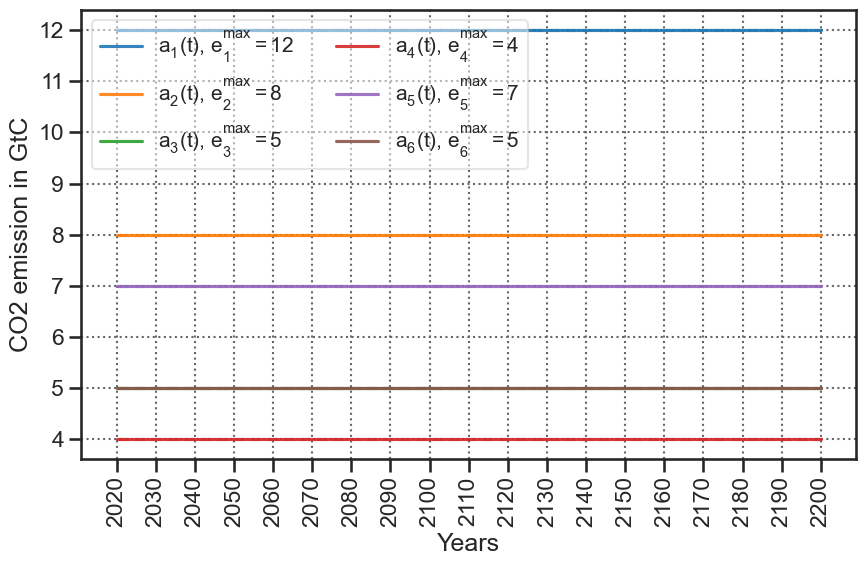

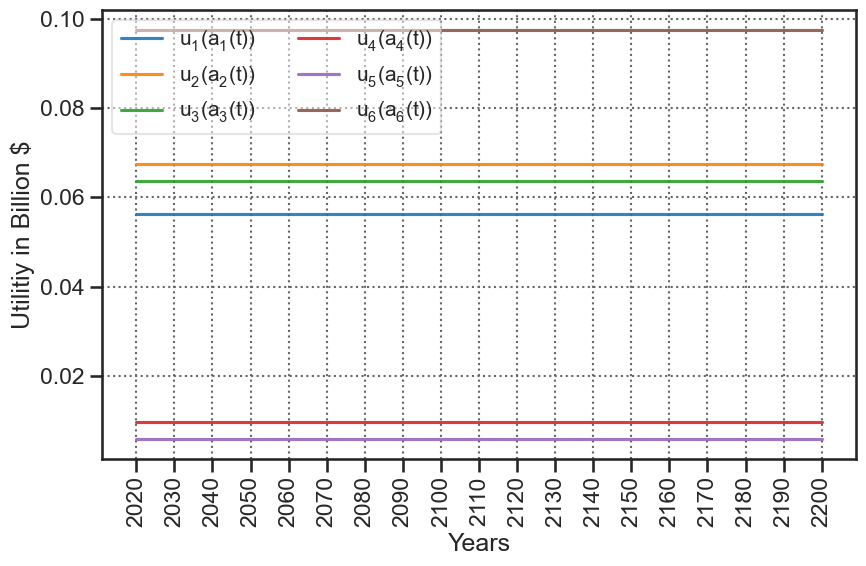

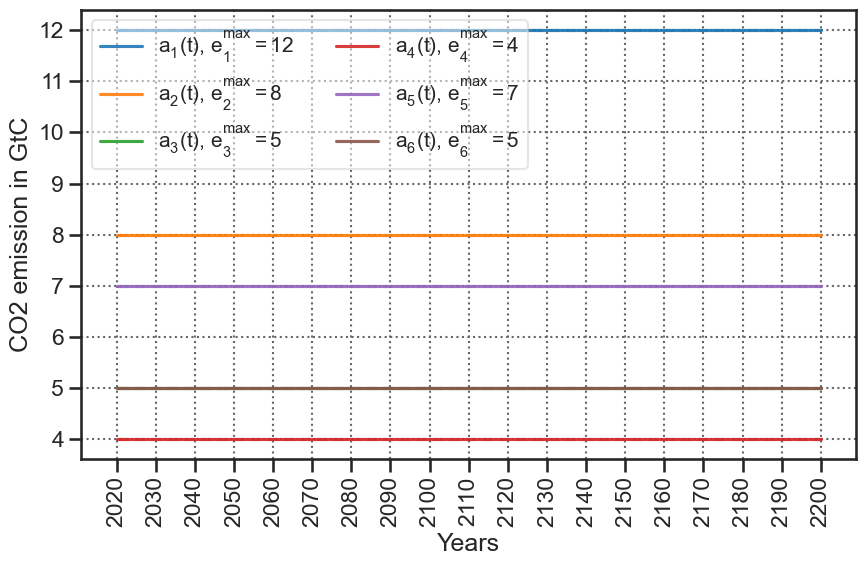

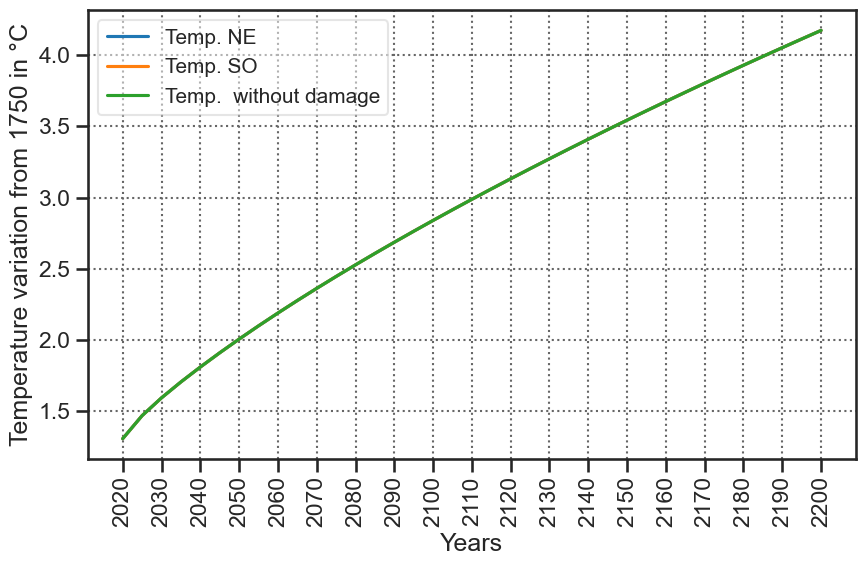

In [26]:
alpha =1

# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,0,0.0022])

# Création des joueurs 

list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                benefit_function = benefit_quadratic_concave_with_percentage_green(gdp_max[i], action_sets[i][1], percentage_green=0),
                                damage_function = DICE_damage_v1(damage_coef),
                                impact_factor_of_temperature = gdp_max[i] , alpha=alpha) for i in range(N)]

# Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

game = Game(deepcopy(smc), list_players)

# Plot du jeux -> le fonction plot est dans plot_function.py

# plot_nash= plot de la best response dynamic , plot_SO = plot les actions social optimales ,  plot_bau = plot les actions sans fonction damage

plot_Game(game, plot_nash=True, plot_SO=True,  plot_bau = True ,figsize=figsize, name='fig')

#### Benefit Convex

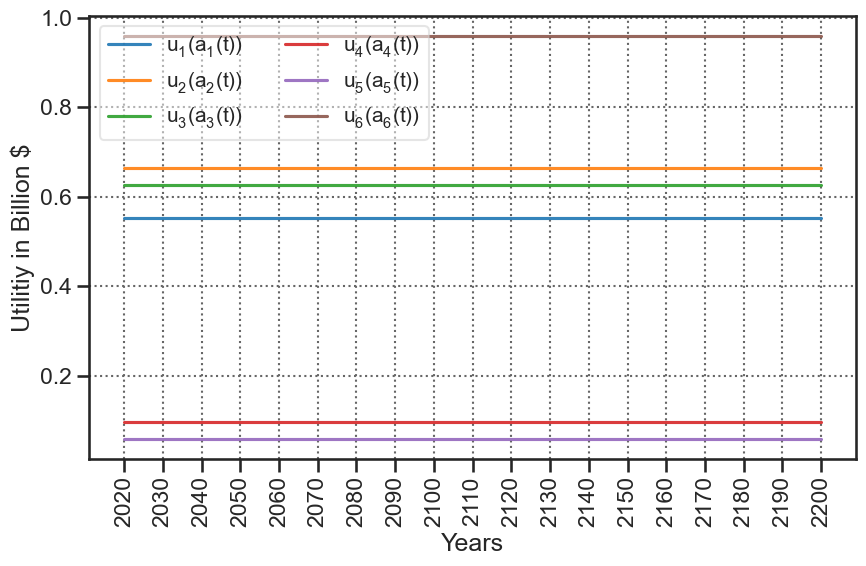

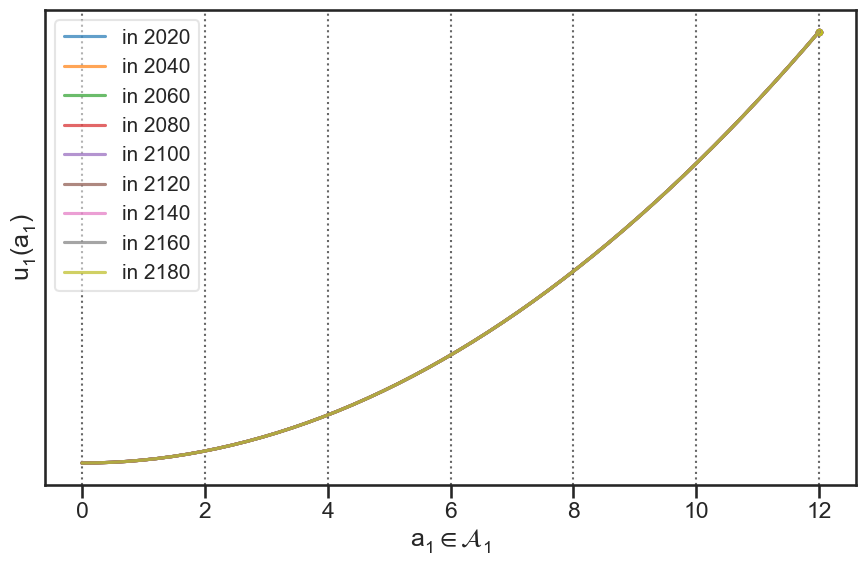

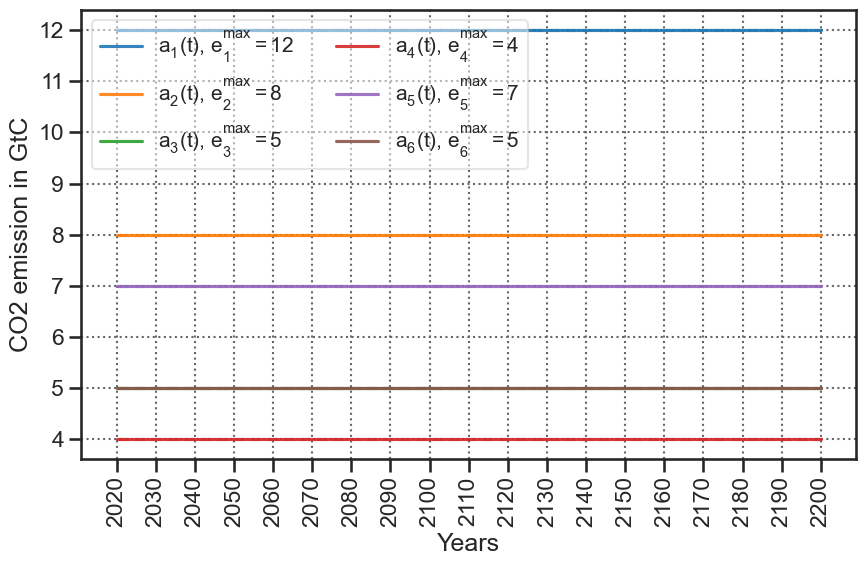

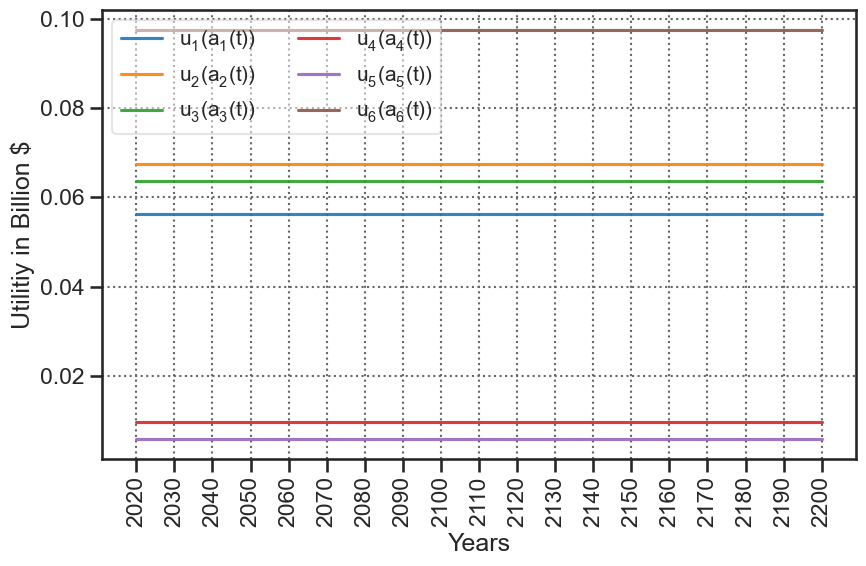

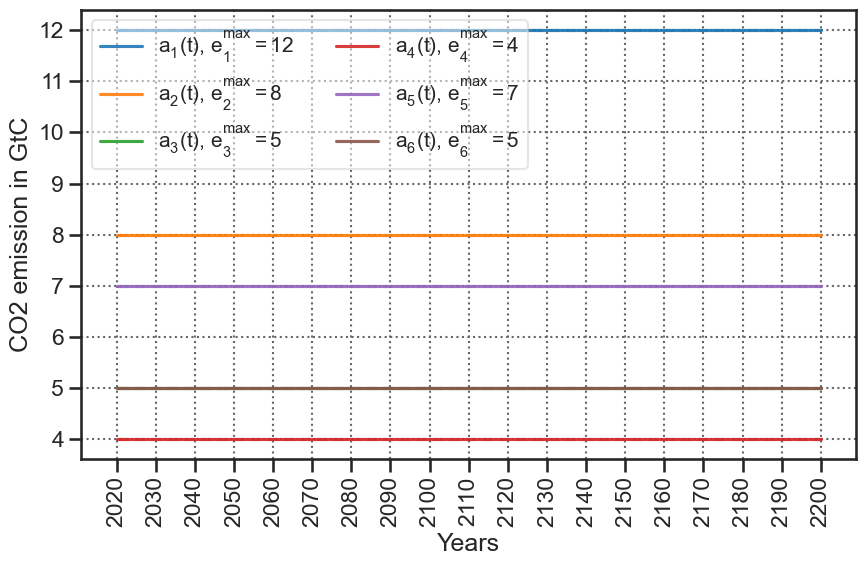

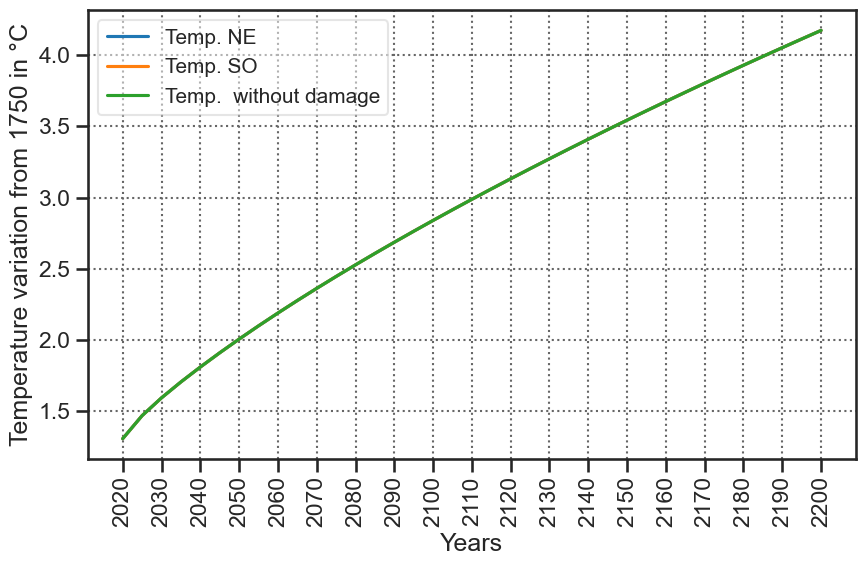

In [27]:
alpha =1

# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,0,0.0022])

# Création des joueurs 

list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                benefit_function = benefit_quadratic_convex_with_percentage_green(gdp_max[i], action_sets[i][1], percentage_green=0),
                                damage_function = DICE_damage_v1(damage_coef),
                                impact_factor_of_temperature = gdp_max[i] , alpha=alpha) for i in range(N)]

# Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

game = Game(deepcopy(smc), list_players)

# Plot du jeux -> le fonction plot est dans plot_function.py

# plot_nash= plot de la best response dynamic , plot_SO = plot les actions social optimales ,  plot_bau = plot les actions sans fonction damage

plot_Game(game, plot_nash=True, plot_SO=True,  plot_bau = True ,figsize=figsize, name='fig')

### Benefit Sigmoid

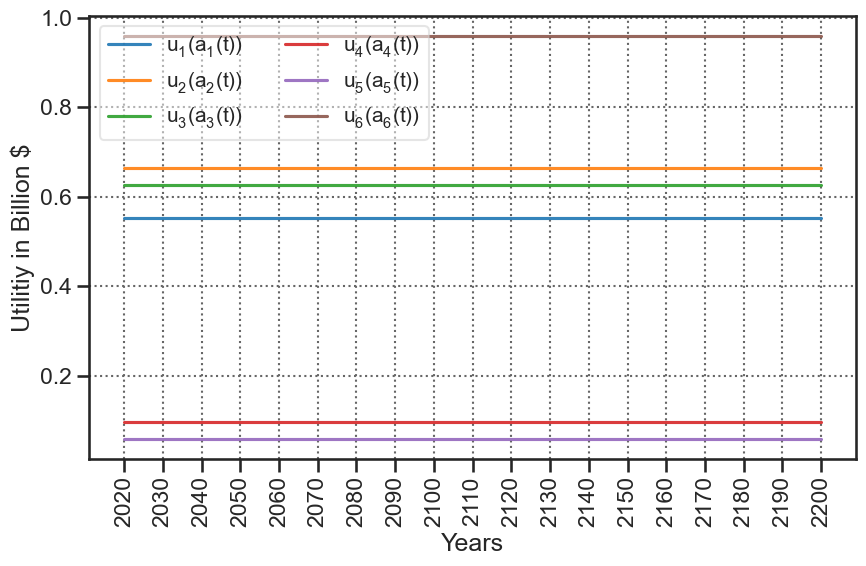

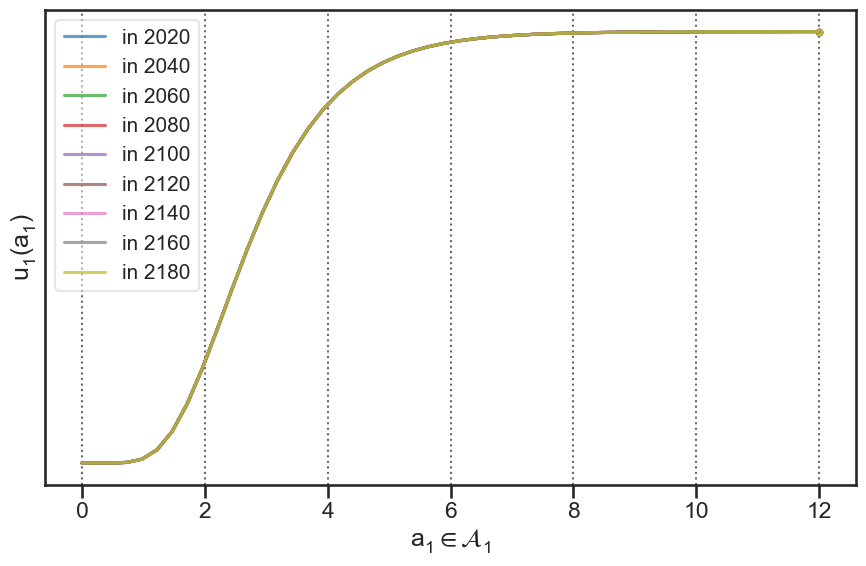

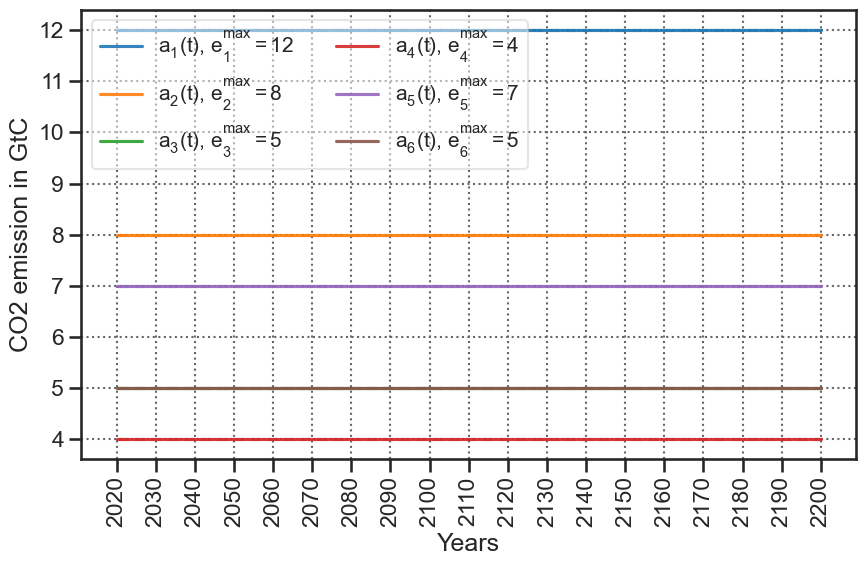

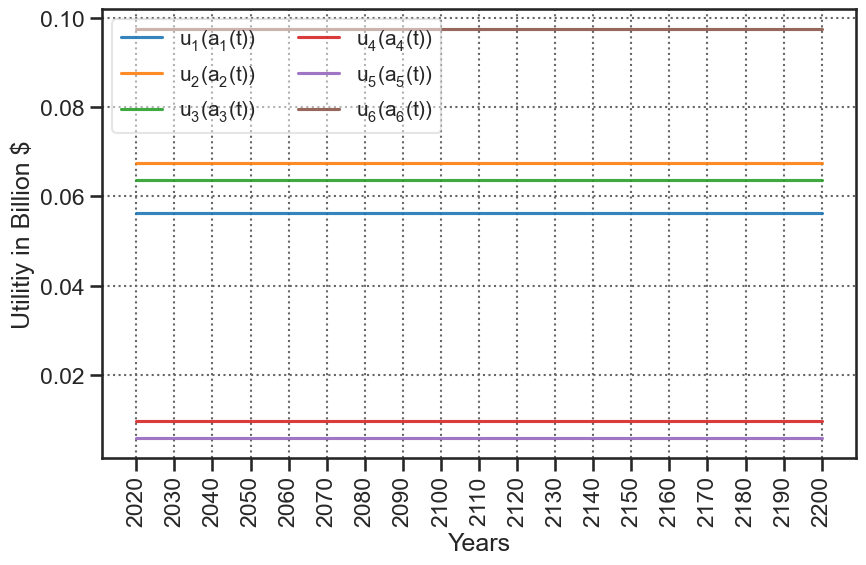

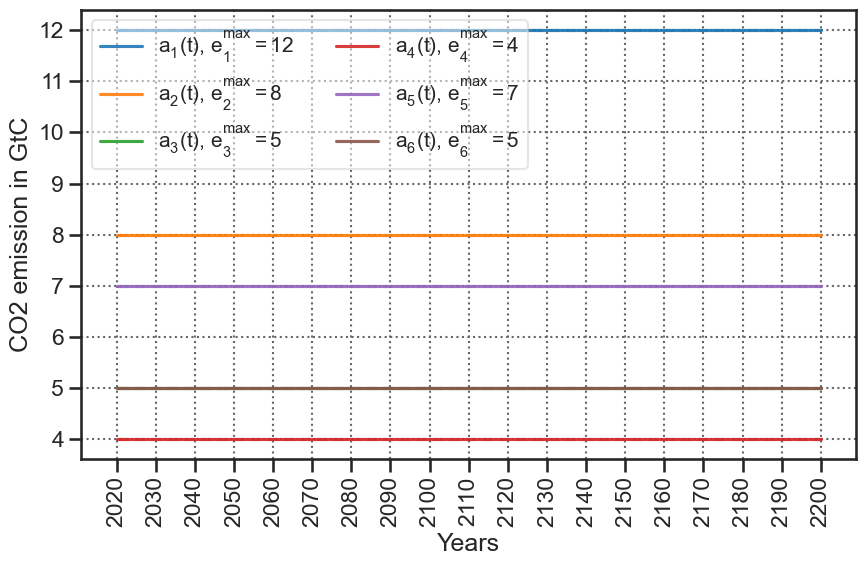

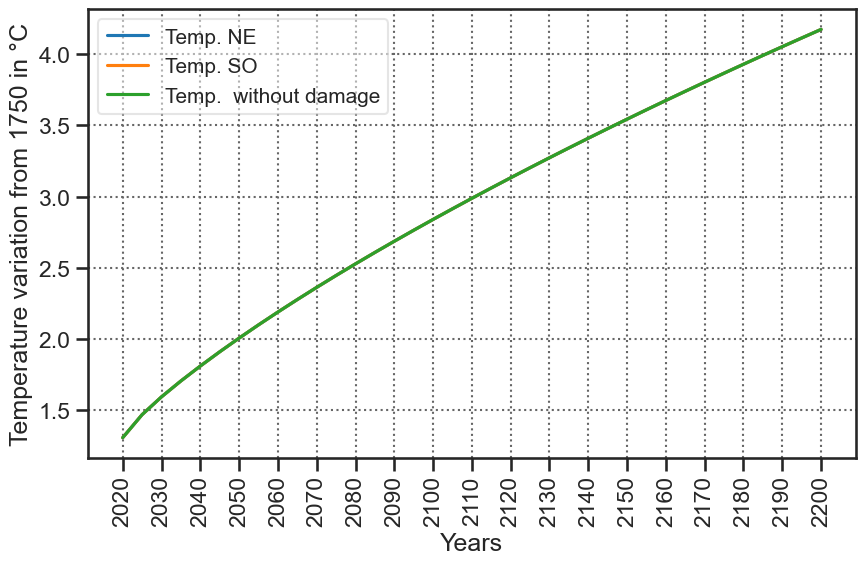

In [28]:
alpha =1

# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,0,0.0022])

# Création des joueurs 

list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                benefit_function = benefice_sigm(gdp_max[i], action_sets[i][1]),
                                damage_function = DICE_damage_v1(damage_coef),
                                impact_factor_of_temperature = gdp_max[i] , alpha=alpha) for i in range(N)]

# Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

game = Game(deepcopy(smc), list_players)

# Plot du jeux -> le fonction plot est dans plot_function.py

# plot_nash= plot de la best response dynamic , plot_SO = plot les actions social optimales ,  plot_bau = plot les actions sans fonction damage

plot_Game(game, plot_nash=True, plot_SO=True,  plot_bau = True ,figsize=figsize, name='fig')

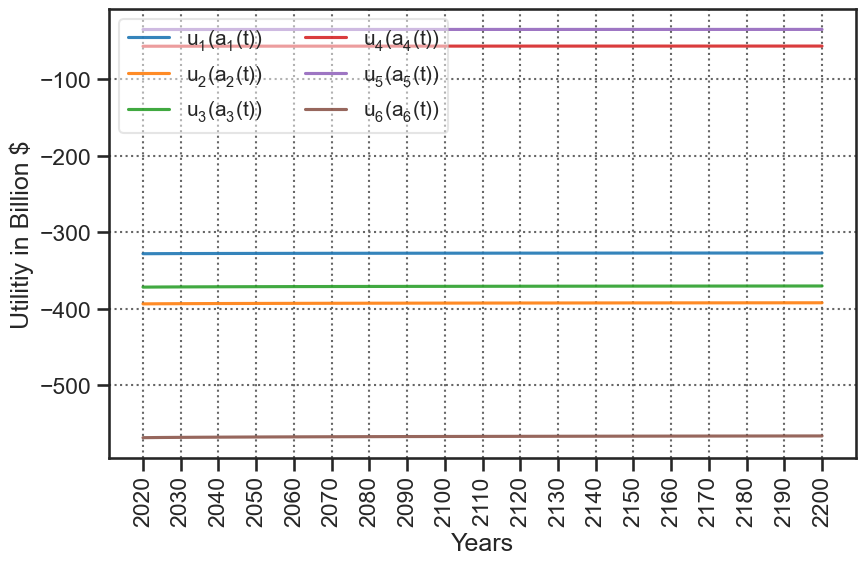

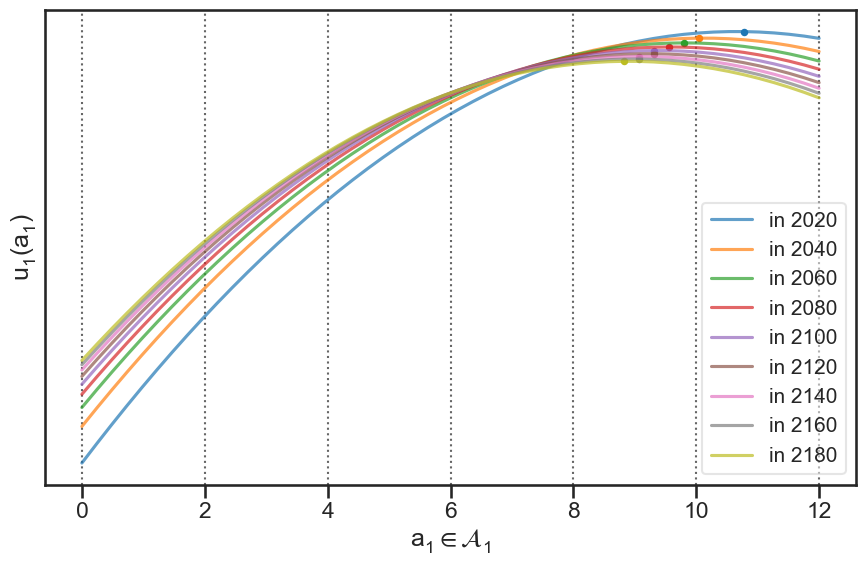

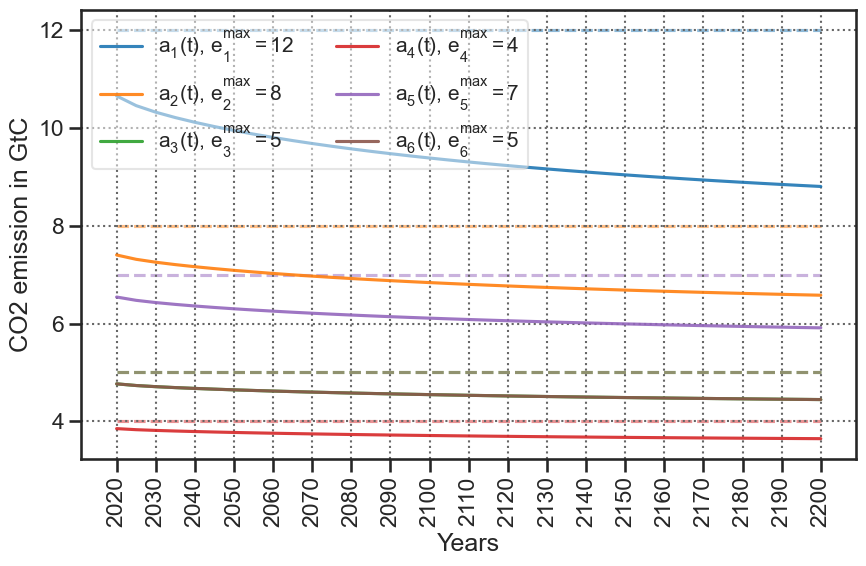

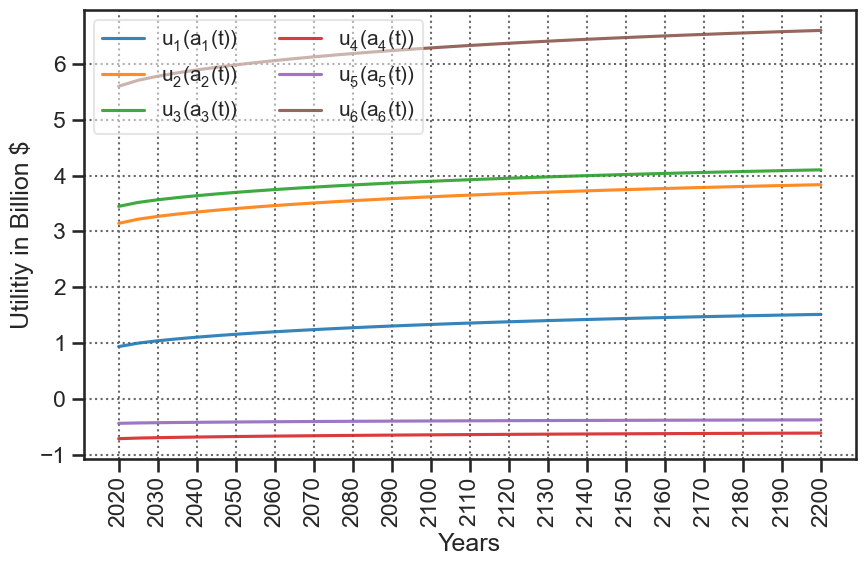

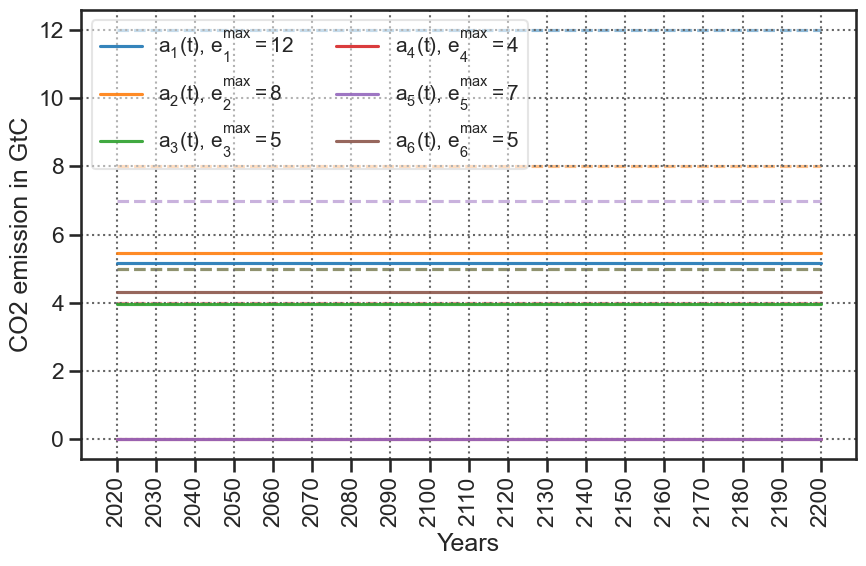

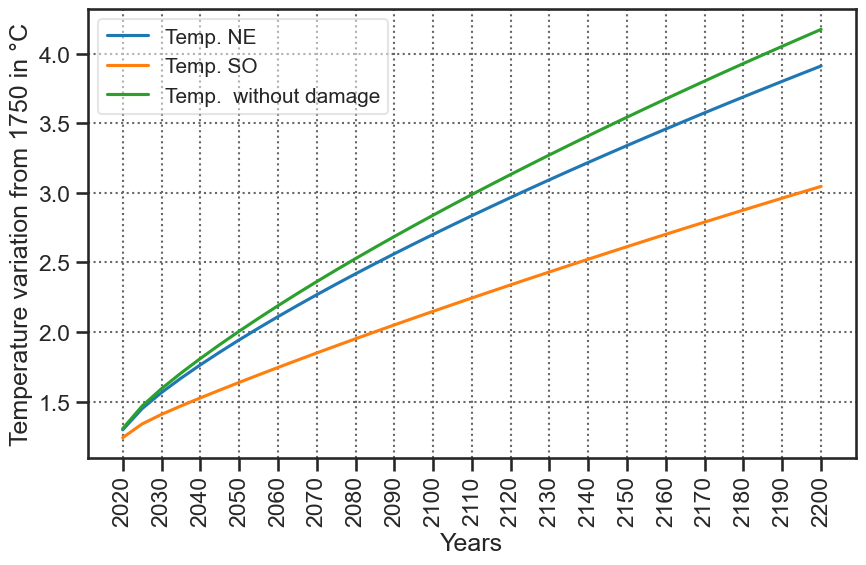

In [51]:

damage_coef = np.array([0,-5,7]) # shift

alpha =1

# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,-2,2])

# Création des joueurs 

list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                benefit_function = benefit_quadratic_concave_with_percentage_green(gdp_max[i], action_sets[i][1], percentage_green=.5),
                                damage_function = damage_polynome(damage_coef),
                                impact_factor_of_temperature = gdp_max[i] , alpha=alpha) for i in range(N)]

# Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

game = Game(deepcopy(smc), list_players)

# Plot du jeux -> le fonction plot est dans plot_function.py

# plot_nash= plot de la best response dynamic , plot_SO = plot les actions social optimales ,  plot_bau = plot les actions sans fonction damage

plot_Game(game, plot_nash=True, plot_SO=True,  plot_bau = True ,figsize=figsize, name='concave_beamer_seminar')

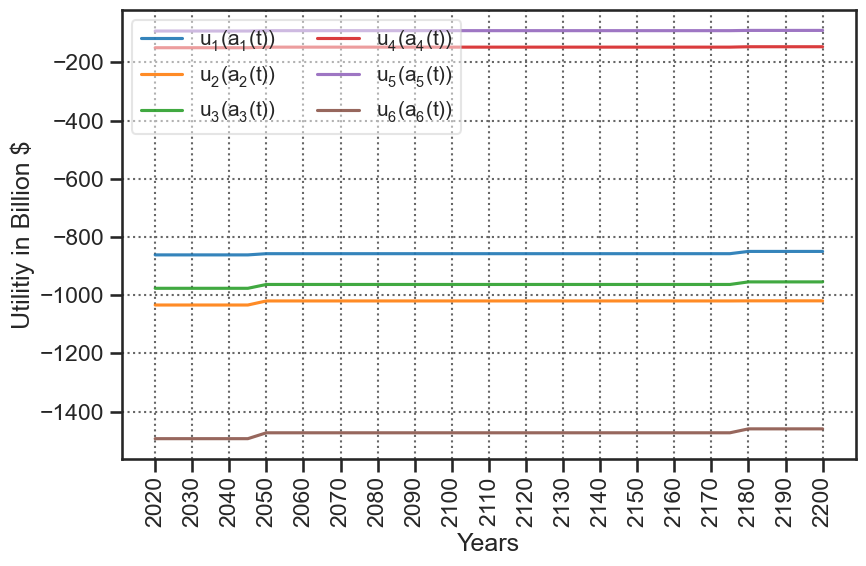

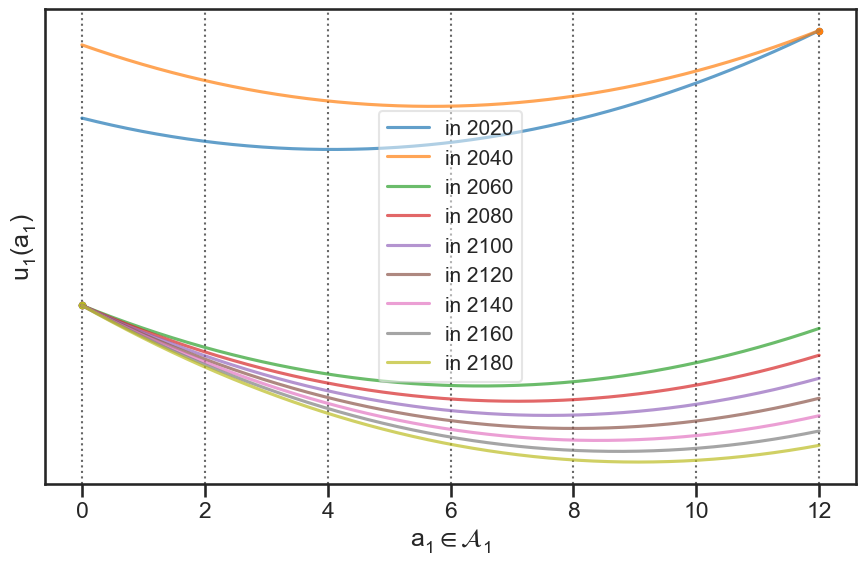

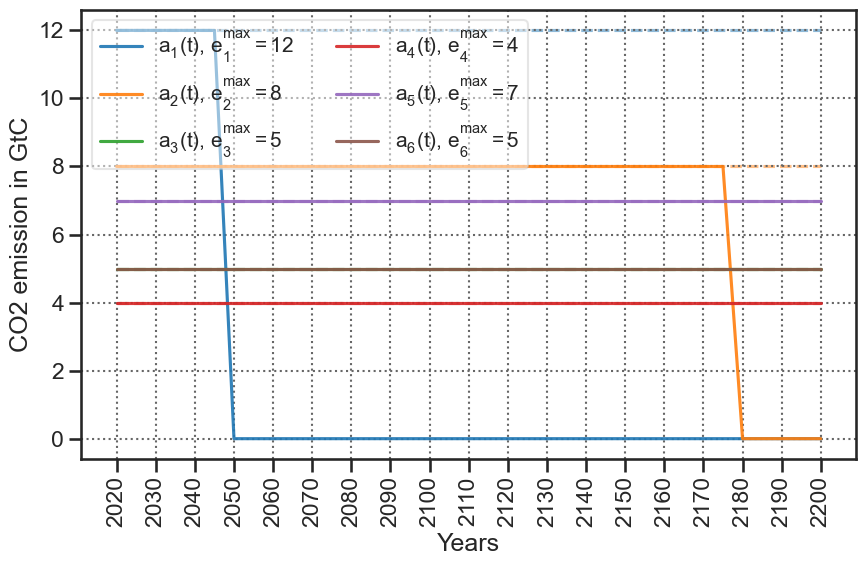

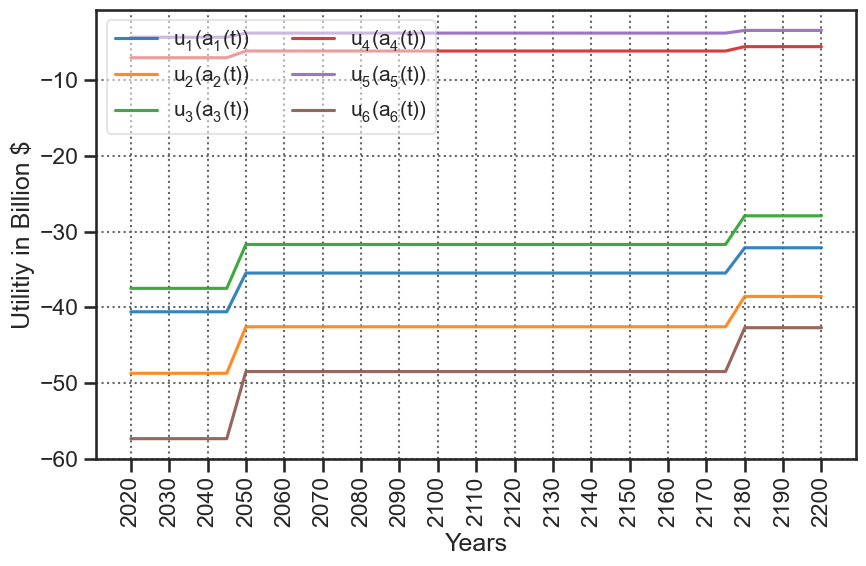

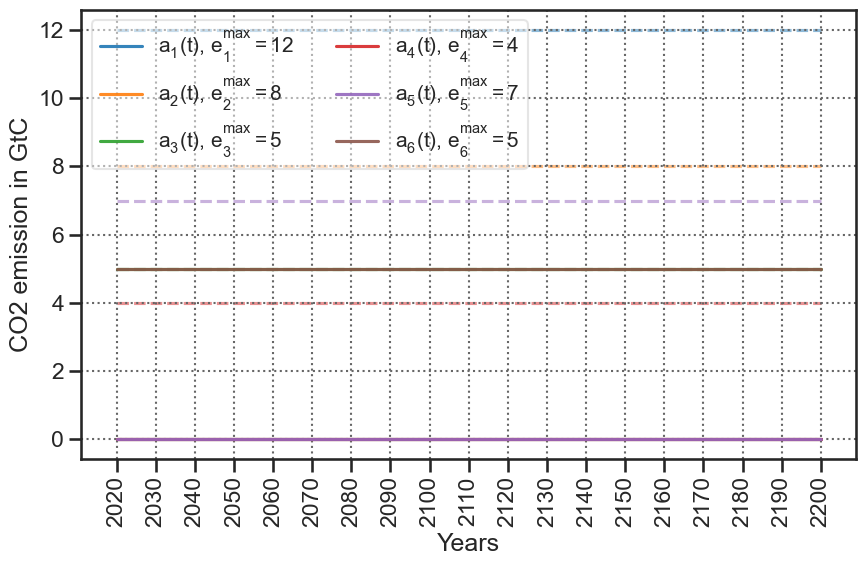

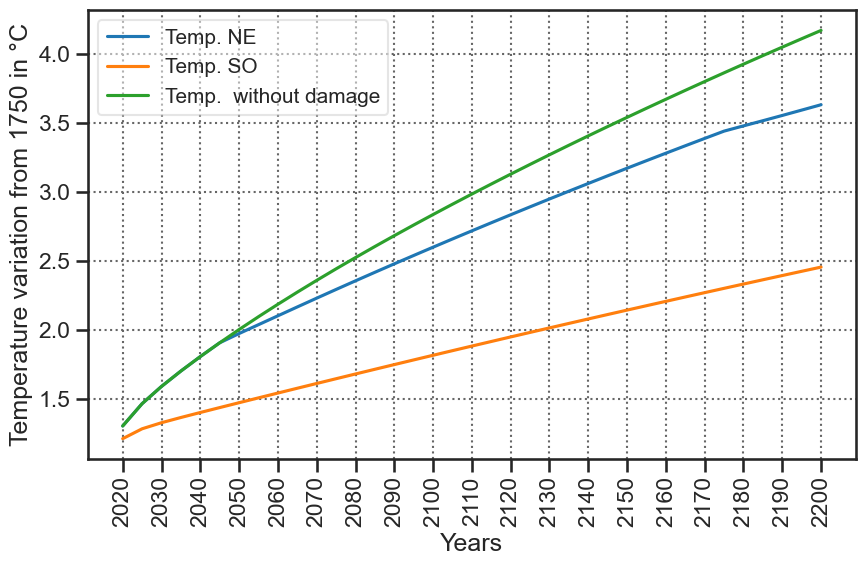

In [52]:

damage_coef = np.array([0,-5,7]) # shift

alpha =1

# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,-5,5.7])

# Création des joueurs 

list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                benefit_function = benefit_quadratic_convex_with_percentage_green(gdp_max[i], action_sets[i][1], percentage_green=.5),
                                damage_function = damage_polynome(damage_coef),
                                impact_factor_of_temperature = gdp_max[i] , alpha=alpha) for i in range(N)]

# Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

game = Game(deepcopy(smc), list_players)

# Plot du jeux -> le fonction plot est dans plot_function.py

# plot_nash= plot de la best response dynamic , plot_SO = plot les actions social optimales ,  plot_bau = plot les actions sans fonction damage

plot_Game(game, plot_nash=True, plot_SO=True,  plot_bau = True ,figsize=figsize, name='convex_beamer_seminar')

On va plot les actions du joueurs 1 au cours du temps dans différents configurations. 

# Fonction damage fixe


In [53]:

# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,-5,5.7])
damage_function = damage_polynome(damage_coef)

## alpha fixe

In [54]:
# puissance de la fonction damage 

alpha = 1


### Benefit function quadratic concave


In [55]:
list_percentage_green = np.arange(0,1.1,0.1)
list_action_player_1 = []

for percentage_green in list_percentage_green:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = benefit_quadratic_concave_with_percentage_green(gdp_max[i], action_sets[i][1], percentage_green=percentage_green),
                                    damage_function = damage_function,
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"{:.0f}% GDP green".format(percentage_green*100)))



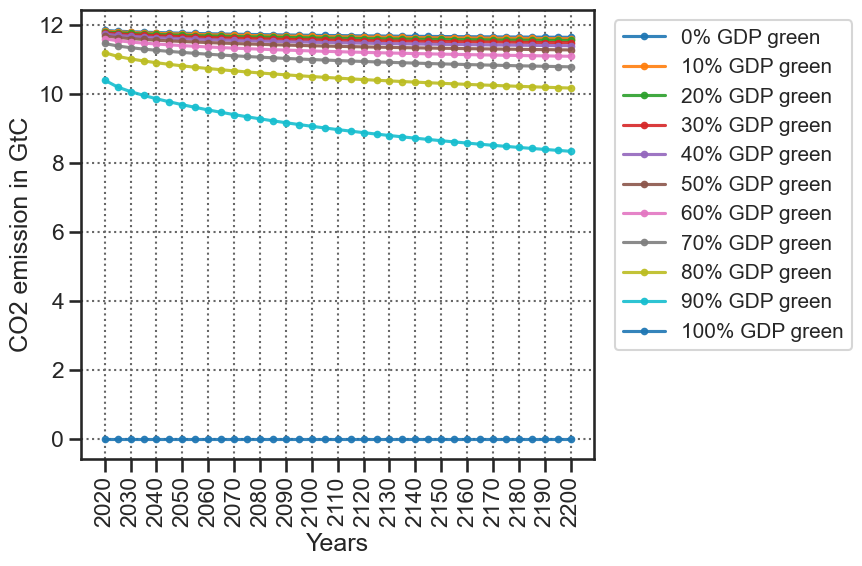

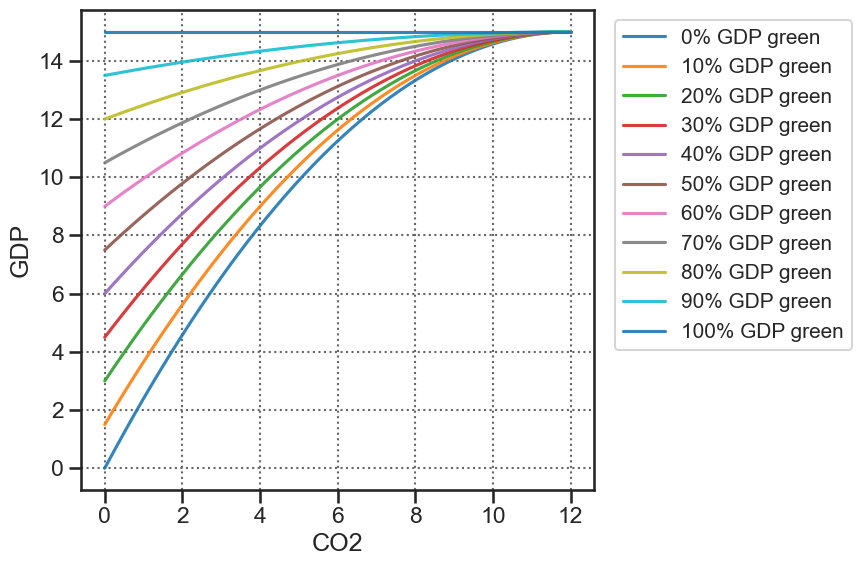

In [56]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


plt.show()

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

x = np.linspace(list_players[0].action_set[0], list_players[0].action_set[1])
for percentage in list_percentage_green:
    benef = benefit_quadratic_concave_with_percentage_green(gdp_max[0], list_players[0].action_set[1], percentage_green=percentage)
    p = plt.plot(x, benef(x), label=r"{:.0f}% GDP green".format(percentage*100), alpha = 0.9)


plt.ylabel('GDP')
plt.xlabel('CO2')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()



### Benefit function quadratic convexe


In [67]:
list_percentage_green = np.arange(.9,1.01,0.01)
list_action_player_1 = []

for percentage_green in list_percentage_green:
    # Création des joueurs 
    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = benefit_quadratic_convex_with_percentage_green(gdp_max[i], action_sets[i][1], percentage_green=percentage_green),
                                    damage_function = damage_function,
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"{:.0f}% GDP green".format(percentage_green*100)))



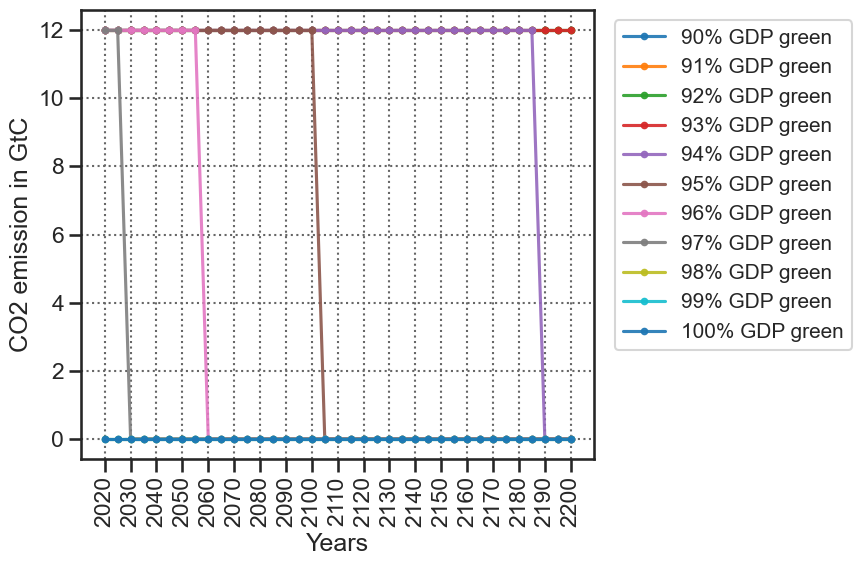

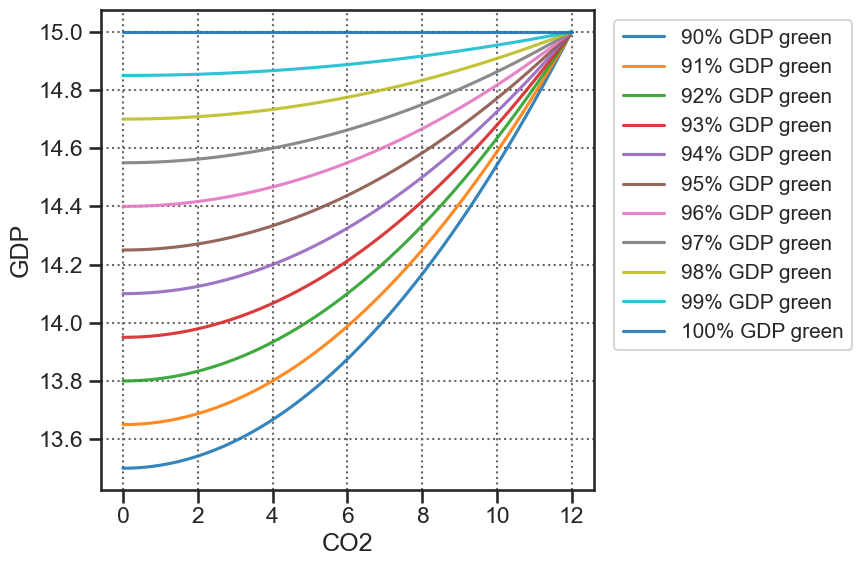

In [68]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

x = np.linspace(list_players[0].action_set[0], list_players[0].action_set[1])
for percentage in list_percentage_green:
    benef = benefit_quadratic_convex_with_percentage_green(gdp_max[0], list_players[0].action_set[1], percentage_green=percentage)
    p = plt.plot(x, benef(x), label=r"{:.0f}% GDP green".format(percentage*100), alpha = 0.9)


plt.ylabel('GDP')
plt.xlabel('CO2')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()




#### Benefit function sigmoid

In [69]:
list_power = [ 0.001, 0.01, 0.1, 0.5, 0.8, 1, 2, 5, 10, 100, 1000]
list_action_player_1 = []

for power in list_power:
    # Création des joueurs 
    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = benefice_sigm(gdp_max[i], action_sets[i][1], power=power),
                                    damage_function = damage_function,
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"power={}".format(power)))


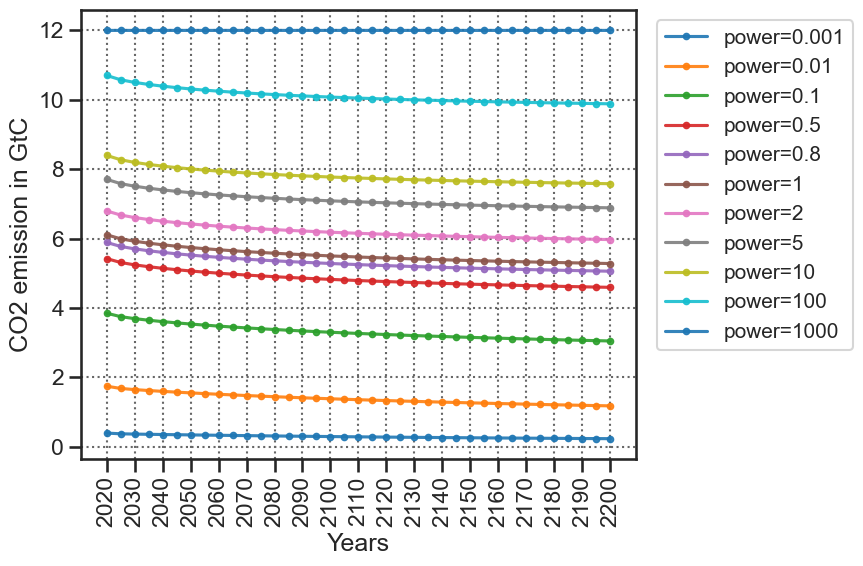

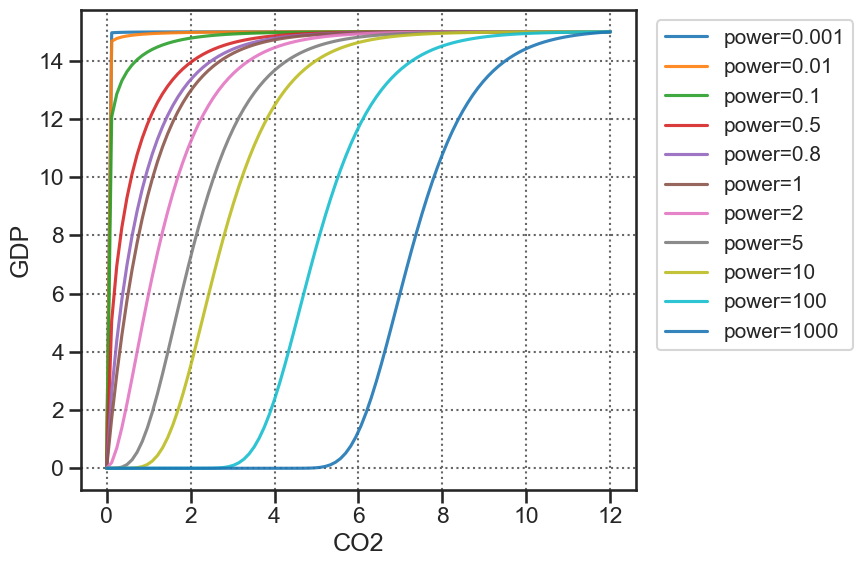

In [70]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

x = np.linspace(list_players[0].action_set[0], list_players[0].action_set[1],100)
for power in list_power:
    benef = benefice_sigm(gdp_max[0], list_players[0].action_set[1], power=power)
    p = plt.plot(x, benef(x), label=r"power={}".format(power), alpha = 0.9)


plt.ylabel('GDP')
plt.xlabel('CO2')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

## benefice fixe

In [39]:
# Coefficients de la fonction dammage (pour un polynome de degré 2)

benef_function = benefit_quadratic_concave_with_percentage_green(gdp_max[0], list_players[0].action_set[1], percentage_green=0.3)
list_benef_function = [benefit_quadratic_concave_with_percentage_green(gdp_max[i], action_sets[i][1], percentage_green=0.3) for i in range(N)]

In [40]:
list_alpha = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 100]
list_action_player_1 = []

for alpha in list_alpha:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_function,
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\alpha$ = {}".format(alpha)))

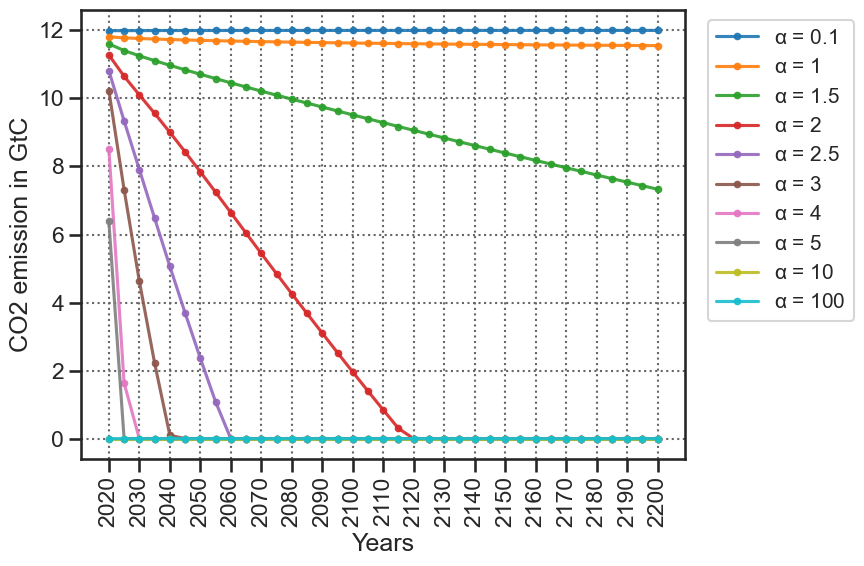

In [41]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()




# Benefice fixe CONCAVE

In [42]:
# Coefficients de la fonction dammage (pour un polynome de degré 2)

benef_function = benefit_quadratic_concave_with_percentage_green(gdp_max[0], list_players[0].action_set[1], percentage_green=0.3)
list_benef_function = [benefit_quadratic_concave_with_percentage_green(gdp_max[i], action_sets[i,1], percentage_green=0.3) for i in range(N)]

### $\alpha = 1$ fixe

In [43]:
alpha = 1

### Changement du coeff quadratic damage

In [44]:
list_damage_coef_quadratic = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for quadratic_coef in list_damage_coef_quadratic:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,0,quadratic_coef])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_2$ = {}".format(quadratic_coef)))

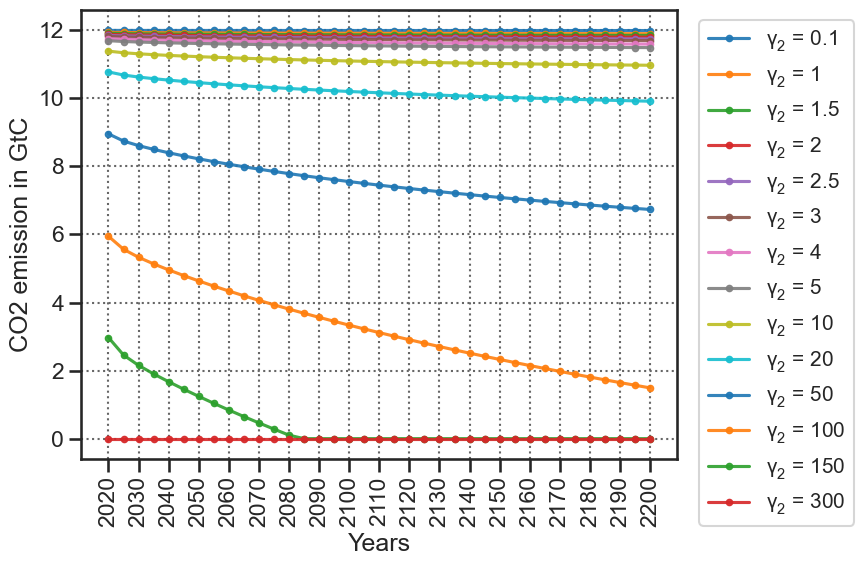

In [45]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


### Changement du coeff linear damage

In [46]:
list_damage_coef_linear = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for linear_coef in list_damage_coef_linear:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,linear_coef,0])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_1$ = {}".format(linear_coef)))

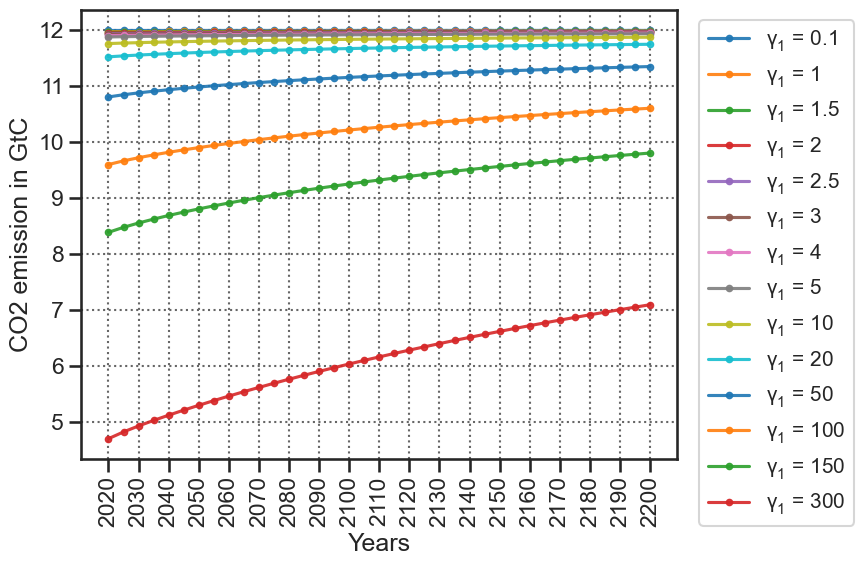

In [47]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


### Changement des coeff linear en négatif et quad damage

In [48]:
list_damage_coef_linear = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for linear_coef in list_damage_coef_linear:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,-linear_coef,linear_coef])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_1$ = -{}, $\gamma_2$ = {}".format(linear_coef,linear_coef)))

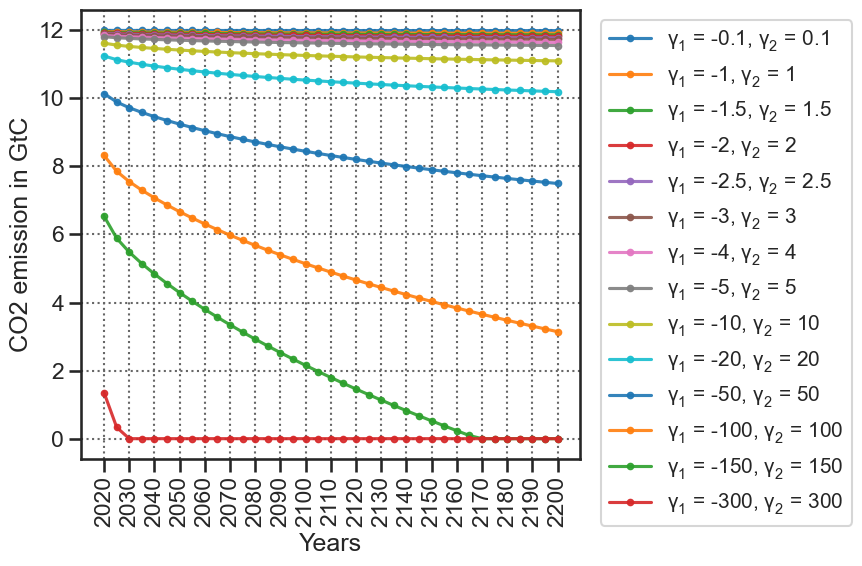

In [49]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


### $\alpha = 2$ fixe

In [50]:
alpha = 2 

### Changement du coeff quadratic damage

In [51]:
list_damage_coef_quadratic = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for quadratic_coef in list_damage_coef_quadratic:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,0,quadratic_coef])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_2$ = {}".format(quadratic_coef)))

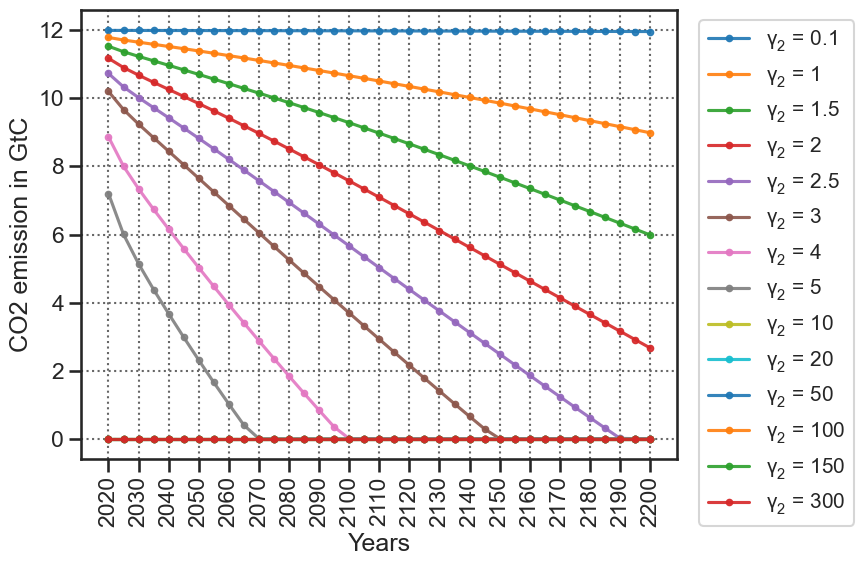

In [52]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


### Changement du coeff linear damage

In [53]:
list_damage_coef_linear = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for linear_coef in list_damage_coef_linear:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,linear_coef,0])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_1$ = {}".format(linear_coef)))

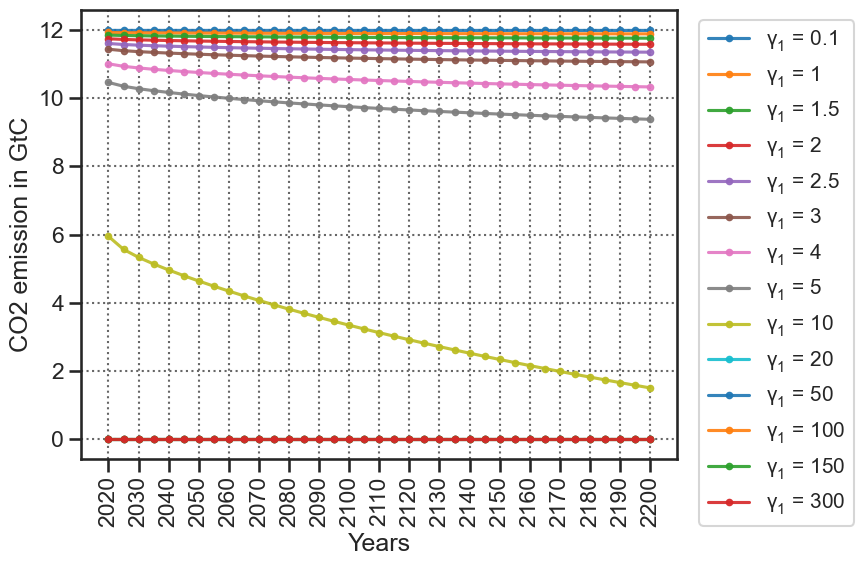

In [54]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


## Damage fixed

In [55]:
# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,-5,5])
damage_function = damage_polynome(damage_coef)

### Variable $\alpha$

In [56]:
list_alpha = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 100]
list_action_player_1 = []

for alpha in list_alpha:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_function,
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\alpha$ = {}".format(alpha)))

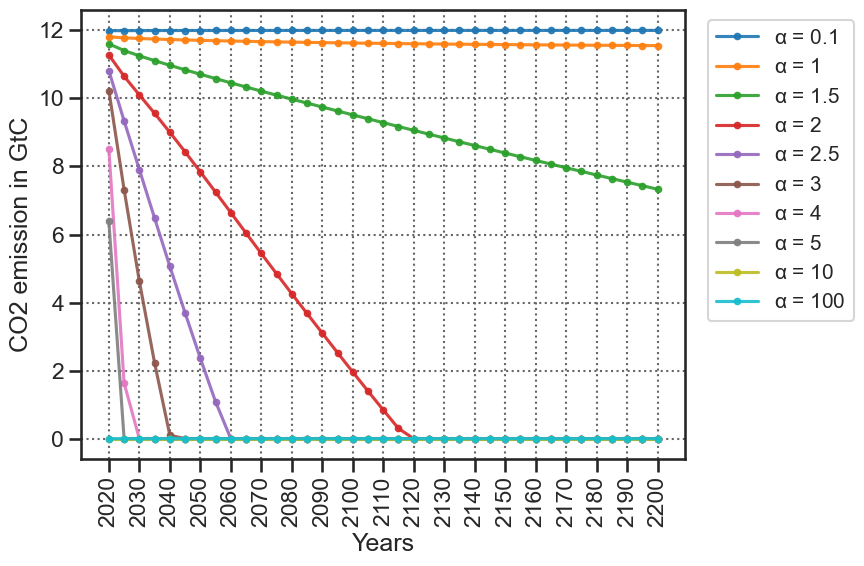

In [57]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()




# Benefice fixe CONVEXE

In [58]:
# Coefficients de la fonction dammage (pour un polynome de degré 2)

benef_function = benefit_quadratic_convex_with_percentage_green(gdp_max[0], list_players[0].action_set[1], percentage_green=0.3)
list_benef_function = [benefit_quadratic_convex_with_percentage_green(gdp_max[i], action_sets[i,1], percentage_green=0.3) for i in range(N)]

### $\alpha = 1$ fixe

In [59]:
alpha = 1

### Changement du coeff quadratic damage

In [60]:
list_damage_coef_quadratic = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for quadratic_coef in list_damage_coef_quadratic:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,0,quadratic_coef])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_2$ = {}".format(quadratic_coef)))

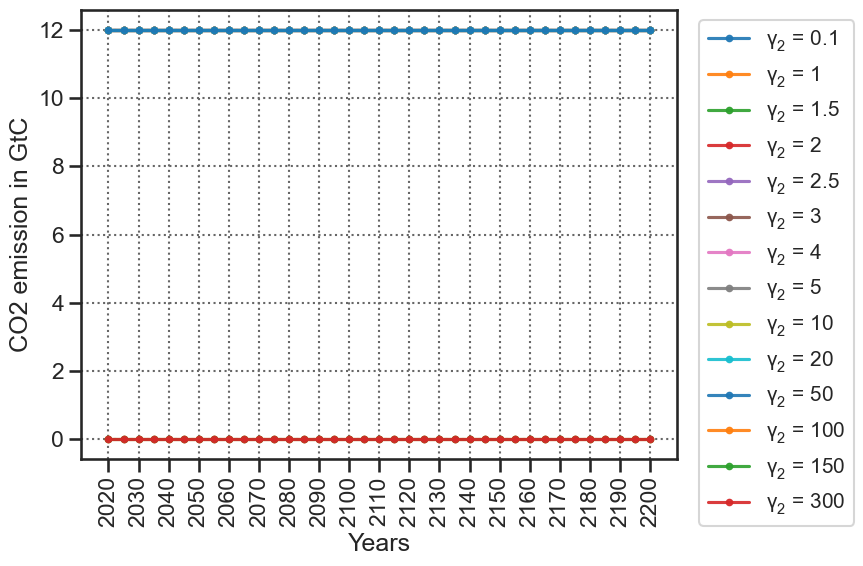

In [61]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


### Changement du coeff linear damage

In [62]:
list_damage_coef_linear = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for linear_coef in list_damage_coef_linear:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,linear_coef,0])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_1$ = {}".format(linear_coef)))

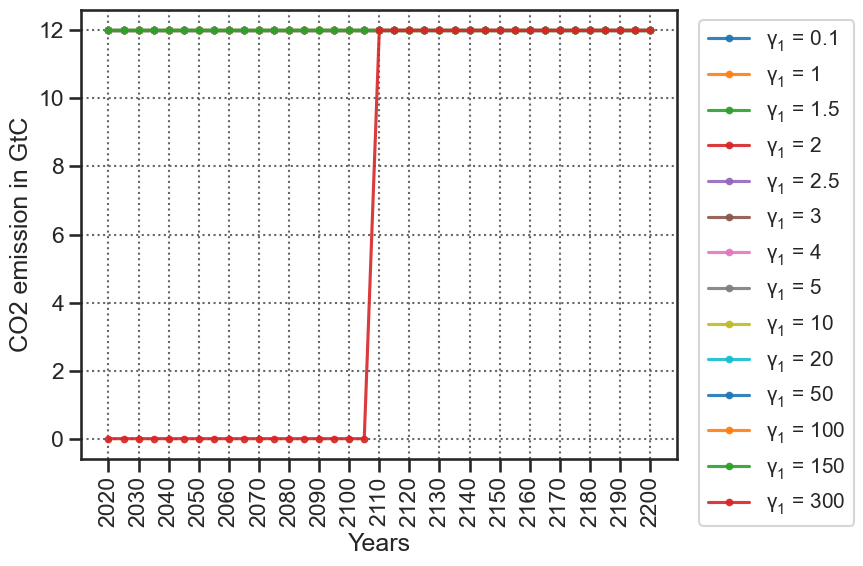

In [63]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


### Changement des coeff linear en négatif et quad damage

In [64]:
list_damage_coef_linear = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for linear_coef in list_damage_coef_linear:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,-linear_coef,linear_coef])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_1$ = -{}, $\gamma_2$ = {}".format(linear_coef,linear_coef)))

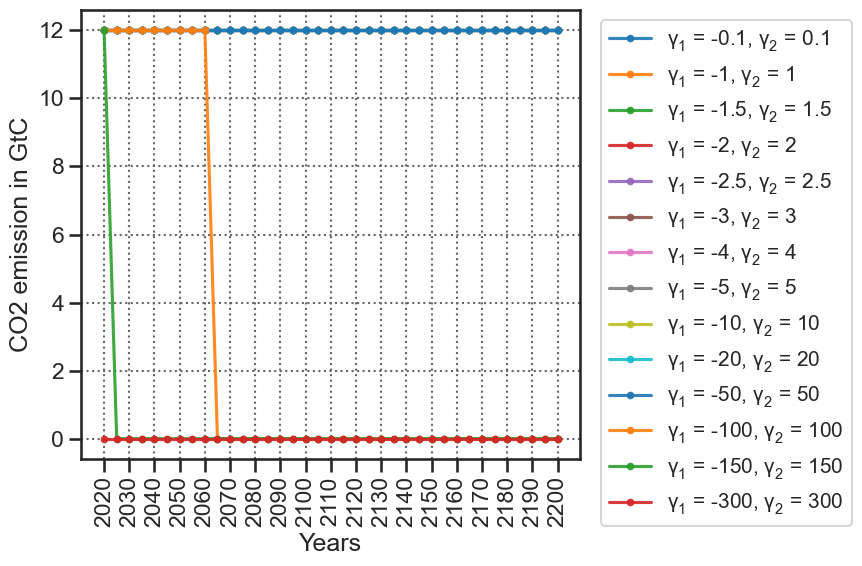

In [65]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


### $\alpha = 2$ fixe

In [66]:
alpha = 2 

### Changement du coeff quadratic damage

In [67]:
list_damage_coef_quadratic = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for quadratic_coef in list_damage_coef_quadratic:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,0,quadratic_coef])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_2$ = {}".format(quadratic_coef)))

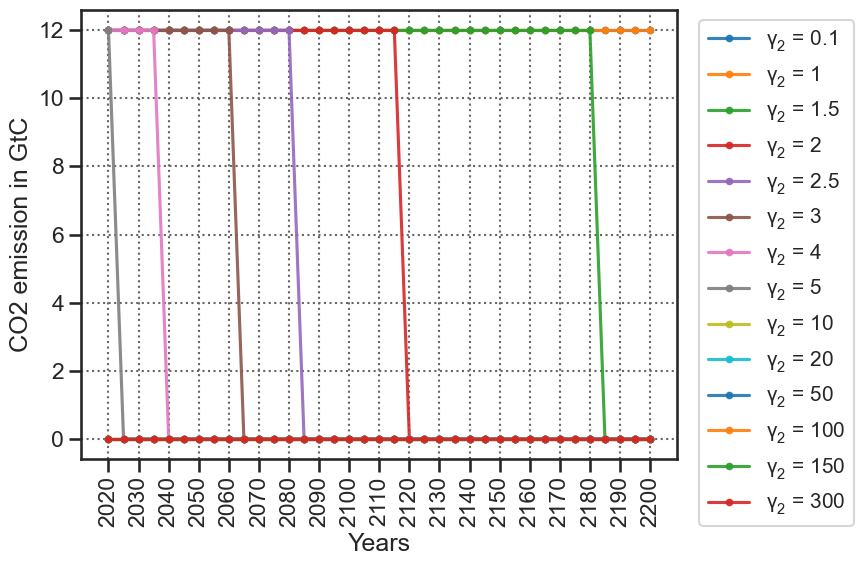

In [68]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


### Changement du coeff linear damage

In [69]:
list_damage_coef_linear = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for linear_coef in list_damage_coef_linear:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,linear_coef,0])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_1$ = {}".format(linear_coef)))

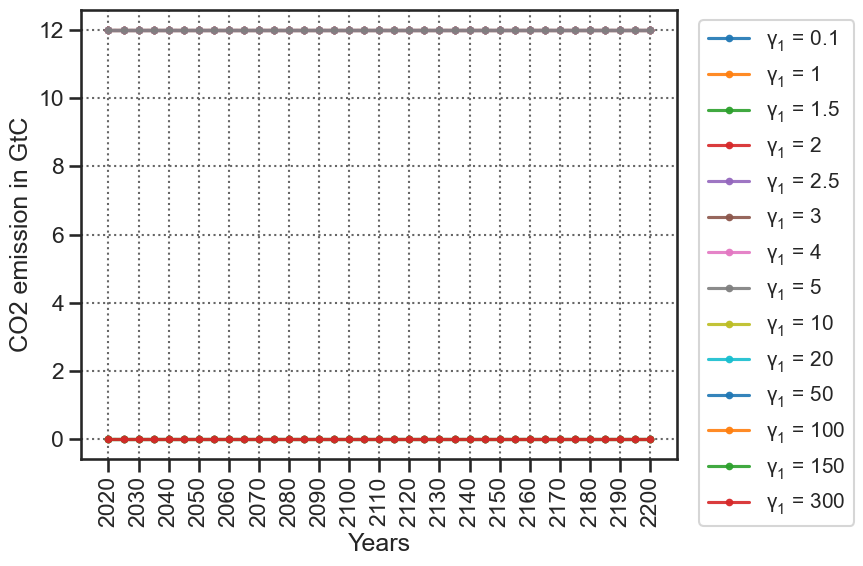

In [70]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()

### Changement des coeff linear en négatif et quad damage

In [71]:
list_damage_coef_linear = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for linear_coef in list_damage_coef_linear:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,-linear_coef,linear_coef])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_1$ = -{}, $\gamma_2$ = {}".format(linear_coef,linear_coef)))

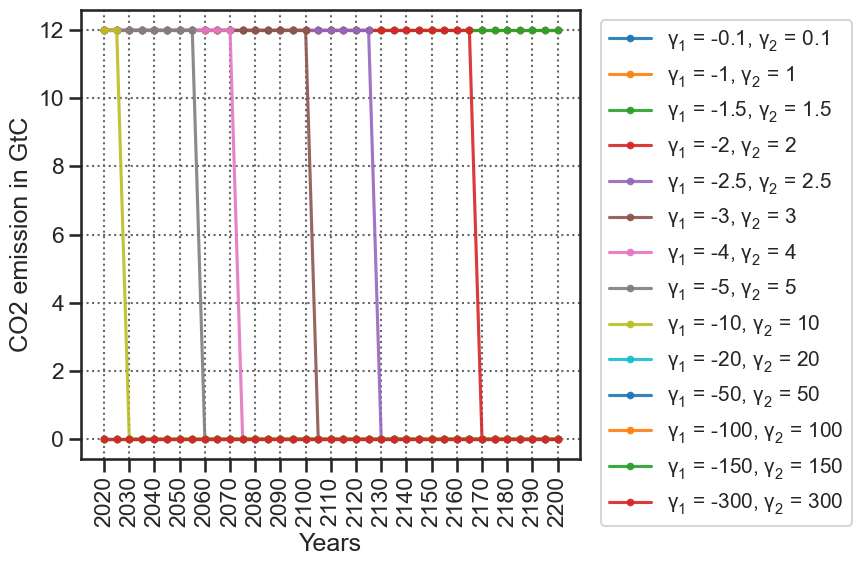

In [72]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


## Damage fixed

In [73]:
# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,-5,5])
damage_function = damage_polynome(damage_coef)

### Variable $\alpha$

In [74]:
list_alpha = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 100]
list_action_player_1 = []

for alpha in list_alpha:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_function,
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\alpha$ = {}".format(alpha)))

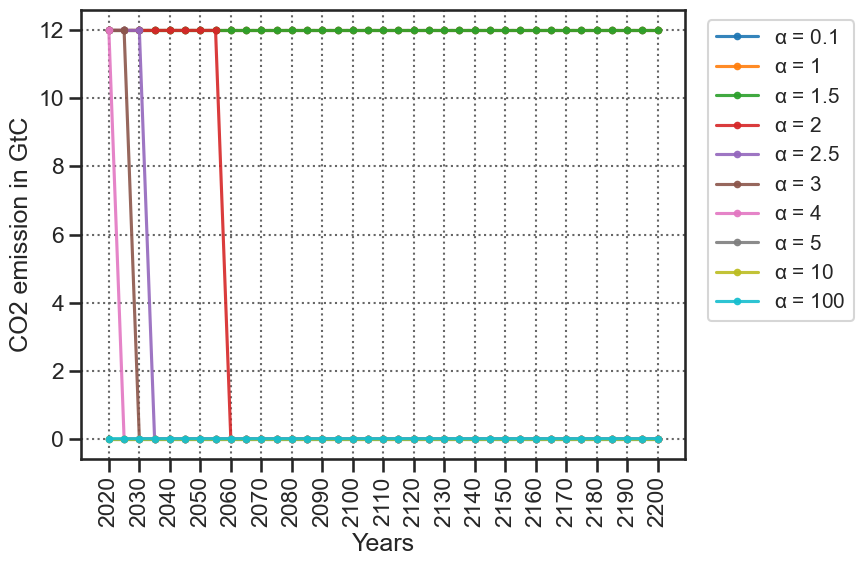

In [75]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()

# Benefice fixe SIGMOID

In [76]:
# Coefficients de la fonction dammage (pour un polynome de degré 2)

benef_function = benefice_sigm(gdp_max[0], list_players[0].action_set[1], power = 10)
list_benef_function = [benefice_sigm(gdp_max[i], action_sets[i,1], power = 10) for i in range(N)]

### $\alpha = 1$ fixe

In [77]:
alpha = 1

### Changement du coeff quadratic damage

In [78]:
list_damage_coef_quadratic = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for quadratic_coef in list_damage_coef_quadratic:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,0,quadratic_coef])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_2$ = {}".format(quadratic_coef)))

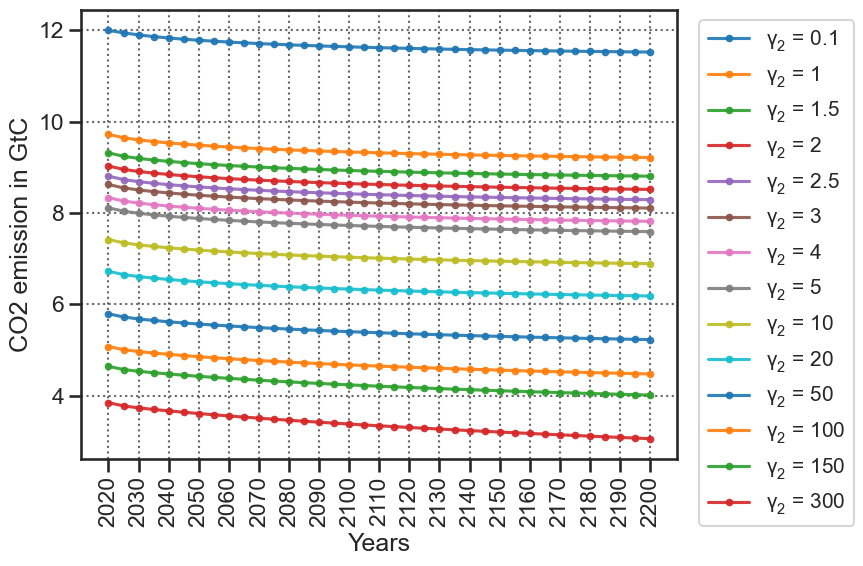

In [79]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


### Changement du coeff linear damage

In [80]:
list_damage_coef_linear = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for linear_coef in list_damage_coef_linear:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,linear_coef,0])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_1$ = {}".format(linear_coef)))

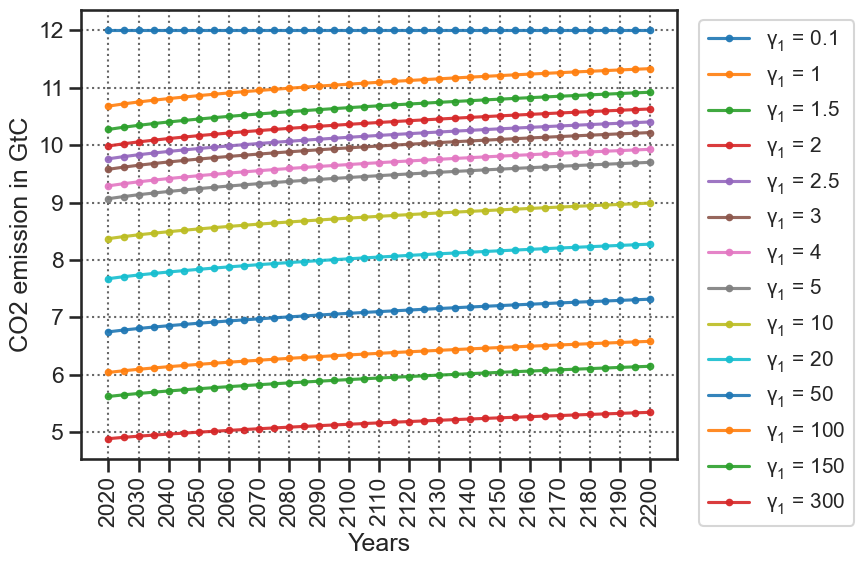

In [81]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


### Changement des coeff linear en négatif et quad damage

In [82]:
list_damage_coef_linear = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for linear_coef in list_damage_coef_linear:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,-linear_coef,linear_coef])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_1$ = -{}, $\gamma_2$ = {}".format(linear_coef,linear_coef)))

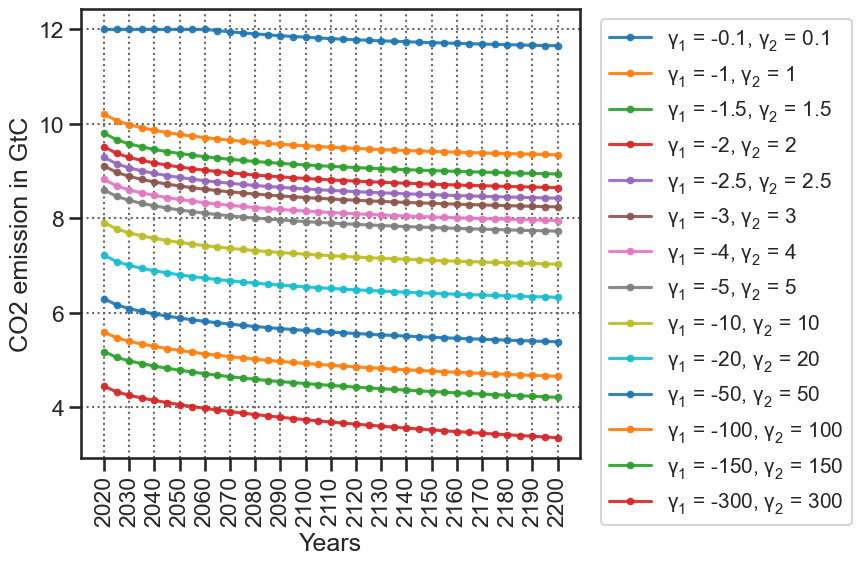

In [83]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


### $\alpha = 2$ fixe

In [84]:
alpha = 2 

### Changement du coeff quadratic damage

In [85]:
list_damage_coef_quadratic = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for quadratic_coef in list_damage_coef_quadratic:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,0,quadratic_coef])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_2$ = {}".format(quadratic_coef)))

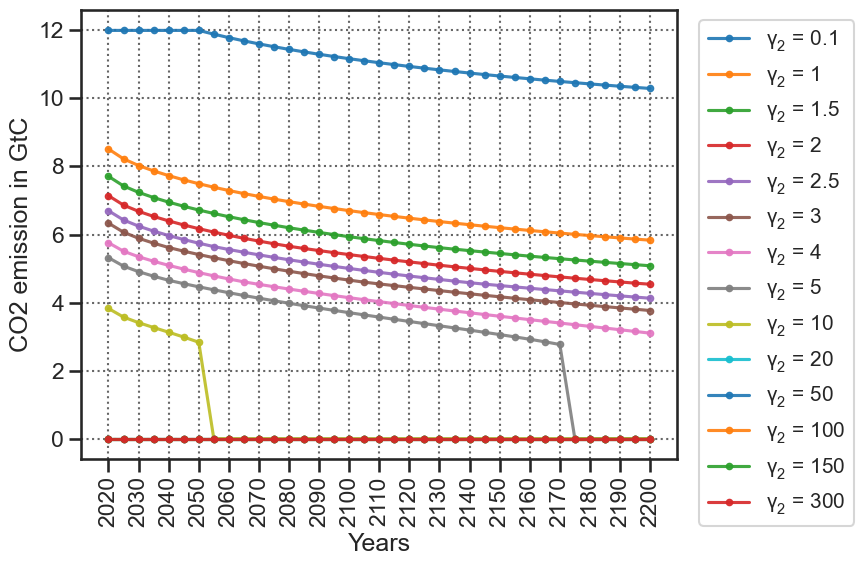

In [86]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


### Changement du coeff linear damage

In [87]:
list_damage_coef_linear = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for linear_coef in list_damage_coef_linear:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,linear_coef,0])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_1$ = {}".format(linear_coef)))

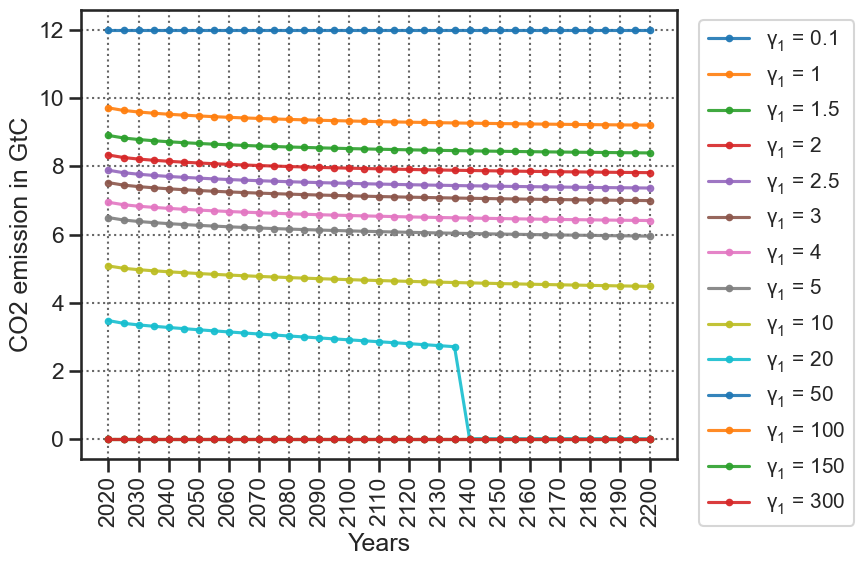

In [88]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()

### Changement des coeff linear en négatif et quad damage

In [89]:
list_damage_coef_linear = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20, 50, 100, 150, 300]
list_action_player_1 = []

for linear_coef in list_damage_coef_linear:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_polynome(np.array([0,-linear_coef,linear_coef])),
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\gamma_1$ = -{}, $\gamma_2$ = {}".format(linear_coef,linear_coef)))

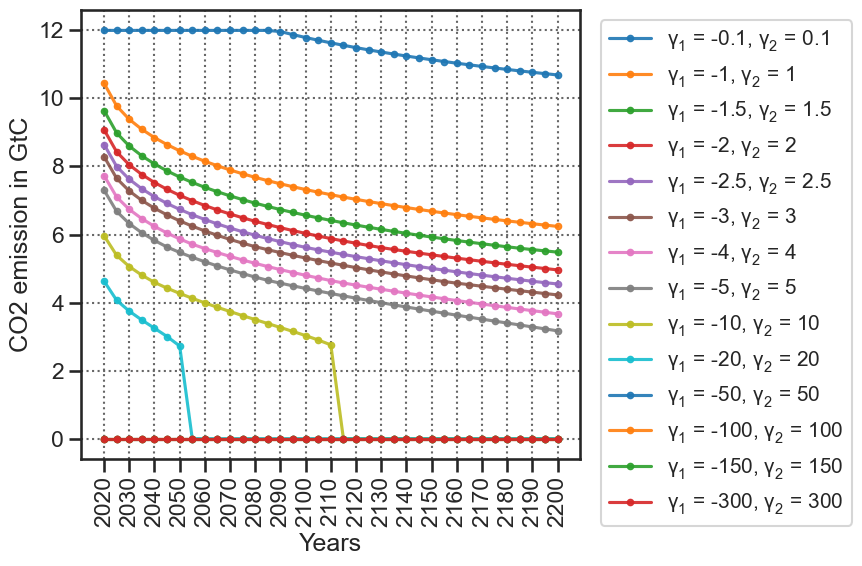

In [90]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()


## Damage fixed

In [91]:
# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,-5,5])
damage_function = damage_polynome(damage_coef)

### Variable $\alpha$

In [92]:
list_alpha = [0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 100]
list_action_player_1 = []

for alpha in list_alpha:
    # Création des joueurs 

    list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                    benefit_function = list_benef_function[i],
                                    damage_function = damage_function,
                                    impact_factor_of_temperature = deltas[i],
                                    alpha=alpha) for i in range(N)]

    # Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game()
    list_action_player_1.append((game.action_profiles[0], r"$\alpha$ = {}".format(alpha)))

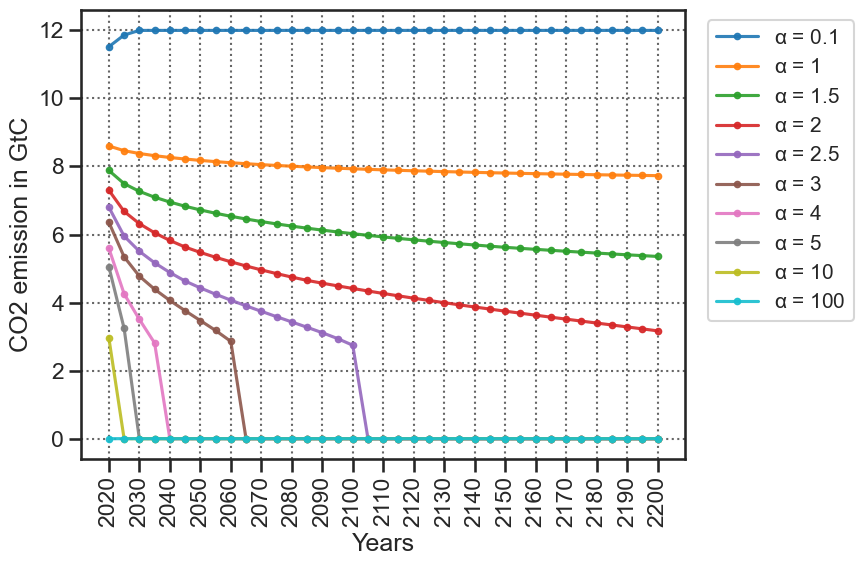

In [93]:
n,tmax = N, game.T

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for item in list_action_player_1:
    action_player_1, label = item
    p = plt.plot(2020 + np.arange(tmax)*5, action_player_1, label=label, marker=".", alpha = 0.9)


plt.ylabel('CO2 emission in GtC')
plt.xlabel('Years')

# plt.title('Players\' actions with respect to the state')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(2020 + np.arange(int(tmax//2)+1)*10, 2020 + np.arange(int(tmax//2)+1)*10, rotation=90)

plt.show()